Сегментация пользователей Банка по потреблению продуктов
=


Задача:
Проанализировать клиентов регионального банка, выявить связи различных характеристик и оттоком клиентов. Сегментировать пользователей по количеству потребляемых продуктов, обращая внимание на отток и активность клиента.
Дать рекомендации команде маркетинга, менеджерам продуктов с целью уменьшить отток клиентов из банка.

План исследования:
1) Загрузка датасета, общая информация о датасете, предобработка данных.

2) Анализ пропусков, причин пропусков, проверка дубликатов.

3) Исследовательский анализ клиентов банка, городов присутствия. Категоризация данных о заработной плате, категоризация возрастных групп(возможно).Расчет медианы дохода, использующих один продукт, два продукта и более трех продуктов. Визуализация данных.

4) Исследование корреляций между различными параметрами, влияние возраста, гендера, заработной платы, баланса счета клиента на количество используемых клиентом банковских продуктов. Матрица корреляций.

5) Исследование влияния различных параметров на отток клиентов, выявление клиентов которые могут уходить.

6) Выявление интересных закономерностей и особенностей в портретах пользователей банка.

7) Разделение клиентов банка на группы и отдельные сегменты. Выделить сегмент премиальных клиентов, сегмент высокоотточных клентов.

8) Проверка  статистических гипотез.
1 гипотеза:
H0: Средний возраст групп клиентов, использующих один продукт и использующих два продукта одинаков, статистически значимых отличий нет.

Н1: Средний возраст групп клиентов, использующих один продукт и два продукта различен, статистически значимые отличия есть.

2 гипотеза:
Н0: Средний доход групп клиентов, использующих один продукт и использующих три и более продукта одинаков.

Н1: Средний доход групп клиентов, использующих один продукт и использующих три и более различается.

9) Презентация с выводами и рекомендациями.

10) Дашборд.


Описание данных:
Датасет содержит данные о клиентах регионального банка. Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

userid — идентификатор пользователя,

score — баллы кредитного скоринга,

City — город,

Gender — пол,

Age — возраст,

equity — количество объектов в собственности,

Balance — баланс на счёте,

Products — количество продуктов, которыми пользуется клиент,

CreditCard — есть ли кредитная карта,

last_activity - активный клиент,

estimated_salary — заработная плата клиента,

Churn — ушёл или нет.

**Загрузка данных, изучение общей информации**

In [2]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
import phik

In [4]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
print(data.head(10))

   USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   
5  202305  856.0    Рыбинск      М  56.0       4   863687.24         3   
6  177259  807.0  Ярославль      Ж  39.0       3   405042.44         3   
7  218868  825.0  Ярославль      Ж  38.0       4   458145.40         2   
8  211686  923.0  Ярославль      М  54.0       5  1206337.87         2   
9  133130  906.0  Ярославль      Ж  67.0       0         NaN         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Предобработка данных, анализ дубликатов и пропусков**

In [6]:
data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace = True )
list(data)

['user_id',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn']

In [7]:
data.duplicated().sum()

0

In [8]:
data[['user_id']].duplicated().sum()

73

In [9]:
data[data.duplicated(['user_id'], keep =False)].sort_values('user_id'). head(15)

user_id  score       city gender   age  equity     balance  products  \
1893   116540  883.0    Рыбинск      Ж  55.0       1   362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0         NaN         1   
7542   117943  880.0  Ярославль      Ж  40.0       0         NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6  1036832.93         4   
5896   120258  905.0  Ярославль      М  30.0       0         NaN         1   
5863   120258  908.0    Рыбинск      Ж  38.0       4  2213581.63         2   
1411   123461  829.0  Ярославль      Ж  59.0       0    96222.44         2   
8638   123461  934.0    Рыбинск      М  34.0       0         NaN         2   
8164   124450  859.0  Ярославль      Ж  38.0       6   516811.20         1   
9775   124450  758.0    Рыбинск      Ж  36.0       0    73574.07         2   
4850   126368  909.0  Ярославль      Ж  30.0       4  1322623.29         2   
5420   126368  832.0    Рыбинск      Ж  33.0       0         NaN         1   
8785   127440  663.0  Ярославль      М   NaN       0         NaN         1   
4443   127440  846.0    Рыбинск      М  66.0       1    57405.67         2   
3988   129785  904.0    Рыбинск      М  33.0       5  2427737.60         3   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
5863            0              1   160327.77      1  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
8164            1              1    95144.63      1  
9775            0              1    79963.59      0  
4850            0              1   140675.66      1  
5420            0              0   118465.34      0  
8785            1              1   117197.56      0  
4443            0              1    17831.63      0  
3988            0              1   188856.75      1

Можно предположить несколько причин появления этих дубликатов: техническая ошибка, некорректное внесение данных, изначально был офис только в Ярославле, а позже открыли еще офис в Рыбинске, поэтому у клиента два счета. Но у некоторых возраст не совпадает, поэтому это могут быть разные клиенты. Не совсем понятна природа этих дубликатов, оставим их.

Выведем количество пропущенных значений для каждого столбца.

In [10]:
data.isna().agg(['sum', 'mean']).T

sum    mean
user_id           0.0  0.0000
score             0.0  0.0000
city              0.0  0.0000
gender            0.0  0.0000
age              26.0  0.0026
equity            0.0  0.0000
balance        2295.0  0.2295
products          0.0  0.0000
credit_card       0.0  0.0000
last_activity     0.0  0.0000
est_salary        0.0  0.0000
churn             0.0  0.0000

Пропуски в двух столбах, возраст и баланс счета. Пропуски в колонке баланс - почти 23%, это достаточно много, эти строки важны для дальнейшего исследования, оставим их. Заменять чем либо некорректно, потому что мы не знаем природу пропусков, это может быть как и некорректное внесение данных, техническая ошибка, как и то, что у клиента нет дебетового счета и соответственно нет денег на счету, он мог открыть только кредитную карту. 
В данных по возрасту есть Nan, это специальное обозначение пропущенных значений типа float, нам необходимо заменить на целочисленный типа для корректного вывода графиков и подсчета.

In [11]:
data.describe()

user_id         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    est_salary         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

In [12]:
data.groupby('city').agg({'balance': [lambda x: sum(x.isna()), lambda x: sum(x.isna()) / x.shape[0]]})

balance           
          <lambda_0> <lambda_1>
city                           
Ростов           235   0.165843
Рыбинск          593   0.220037
Ярославль       1467   0.249151

In [13]:
display (data[data['balance'].isna()].describe())

user_id        score          age       equity  balance  \
count    2295.000000  2295.000000  2279.000000  2295.000000      0.0   
mean   172069.447930   865.352070    42.093023     0.050980      NaN   
std     33337.084589    89.603091    11.941551     0.225872      NaN   
min    114182.000000   642.000000    18.000000     0.000000      NaN   
25%    143095.500000   871.000000    33.000000     0.000000      NaN   
50%    172659.000000   903.000000    40.000000     0.000000      NaN   
75%    201551.000000   922.000000    49.000000     0.000000      NaN   
max    229145.000000   990.000000    86.000000     3.000000      NaN   

          products  credit_card  last_activity    est_salary        churn  
count  2295.000000  2295.000000    2295.000000  2.295000e+03  2295.000000  
mean      1.162092     0.815686       0.549455  2.263102e+05     0.005664  
std       0.402532     0.387824       0.497657  1.997718e+05     0.075066  
min       0.000000     0.000000       0.000000  2.027403e+04     0.000000  
25%       1.000000     1.000000       0.000000  1.203477e+05     0.000000  
50%       1.000000     1.000000       1.000000  1.741607e+05     0.000000  
75%       1.000000     1.000000       1.000000  2.400150e+05     0.000000  
max       3.000000     1.000000       1.000000  1.333687e+06     1.000000

Пользователи, у которых пропуск в колонке баланс, пользовались как правило одним продуктом, оценки объектов собственности низкие в основном это 0.

In [14]:
data = data.dropna(subset = ['age'])
data['age'] = data['age'].astype('int',errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


In [15]:
data['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

products
0       1
1    3323
2    5108
3    1038
4     474
5      19
Name: user_id, dtype: int64

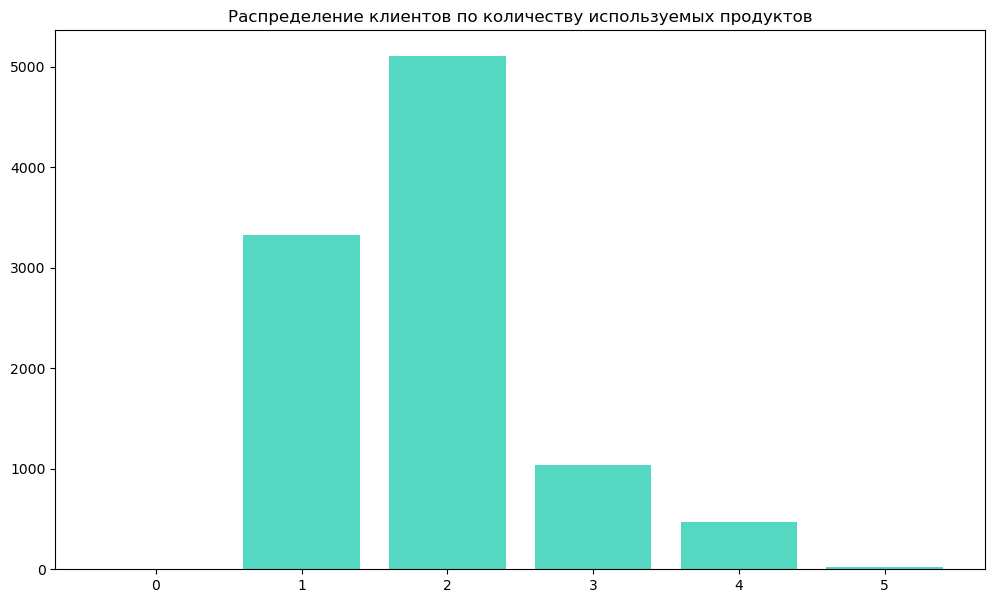

In [16]:
plt.figure(figsize=(12, 7))
prod_data = data.groupby('products')['user_id'].nunique()
plt.bar(height=prod_data, x = prod_data.index, color='#55D8C1')
plt.title('Распределение клиентов по количеству используемых продуктов')
data.groupby('products')['user_id'].nunique()

Чуть больше половины датасета у нас с данными клиентов с двумя продуктами - 5114, вторая большая группа с одним продуктом -3327 и третья небольшая группа с тремя и больше продуктами - в районе 1500 клиентов.

In [17]:
data[data['products']==0]

user_id  score     city gender  age  equity  balance  products  \
8957   147837  962.0  Рыбинск      Ж   79       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

Этот единственный клиент ушел из банка, удалим его, для дальнейшего исследования эти данные не нужны.

In [18]:
data = data[data['products']!=0]

Посмотрим на распределение значений непрерывных переменных в нашем датасете

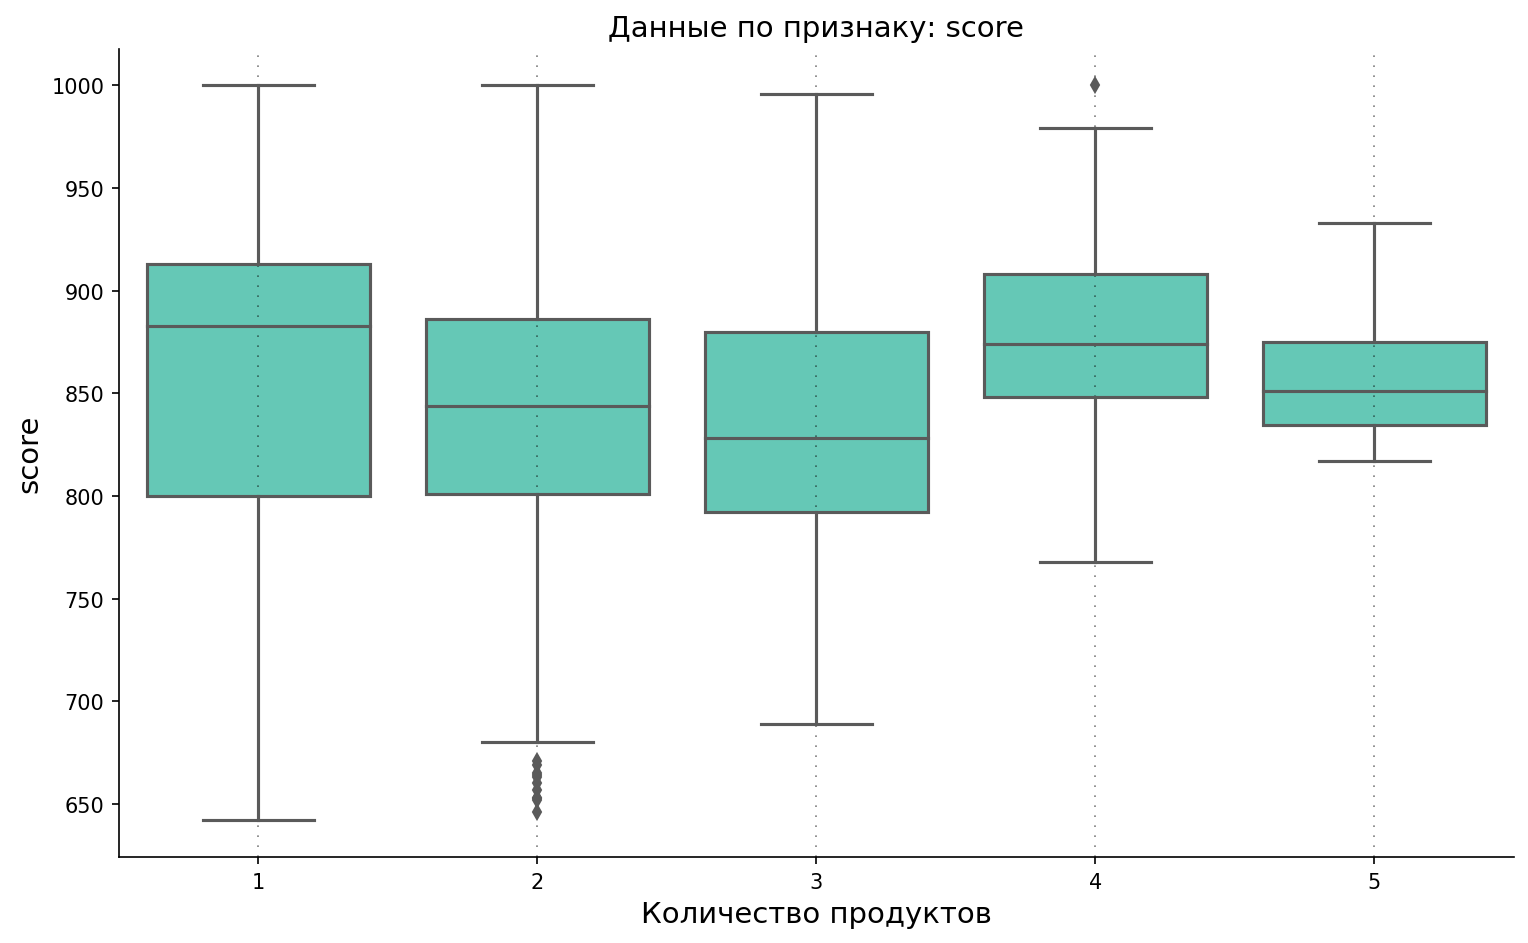

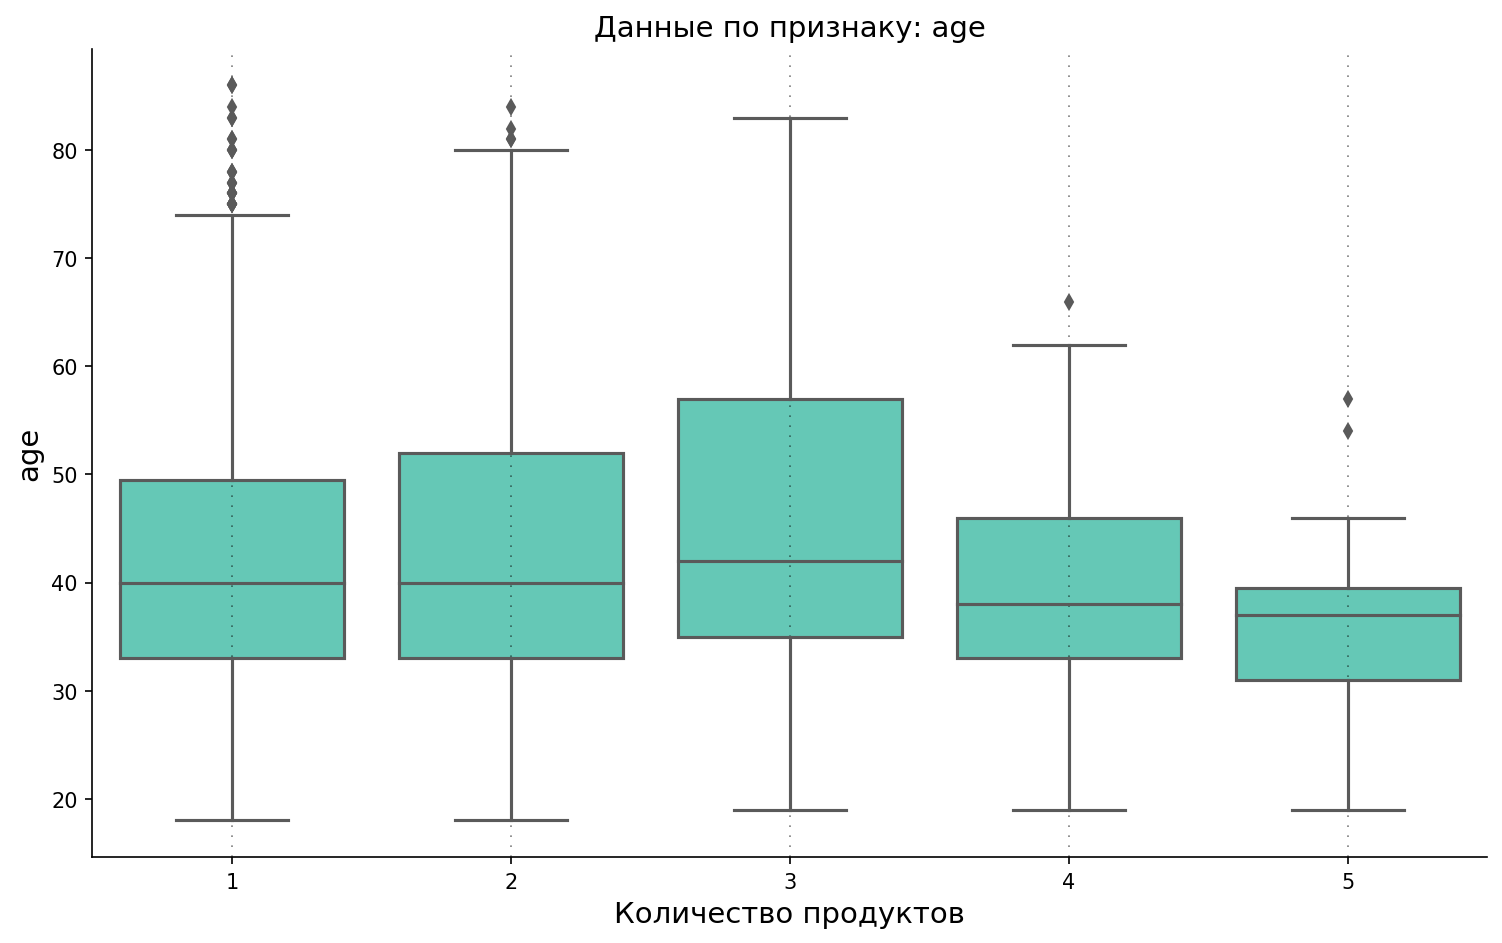

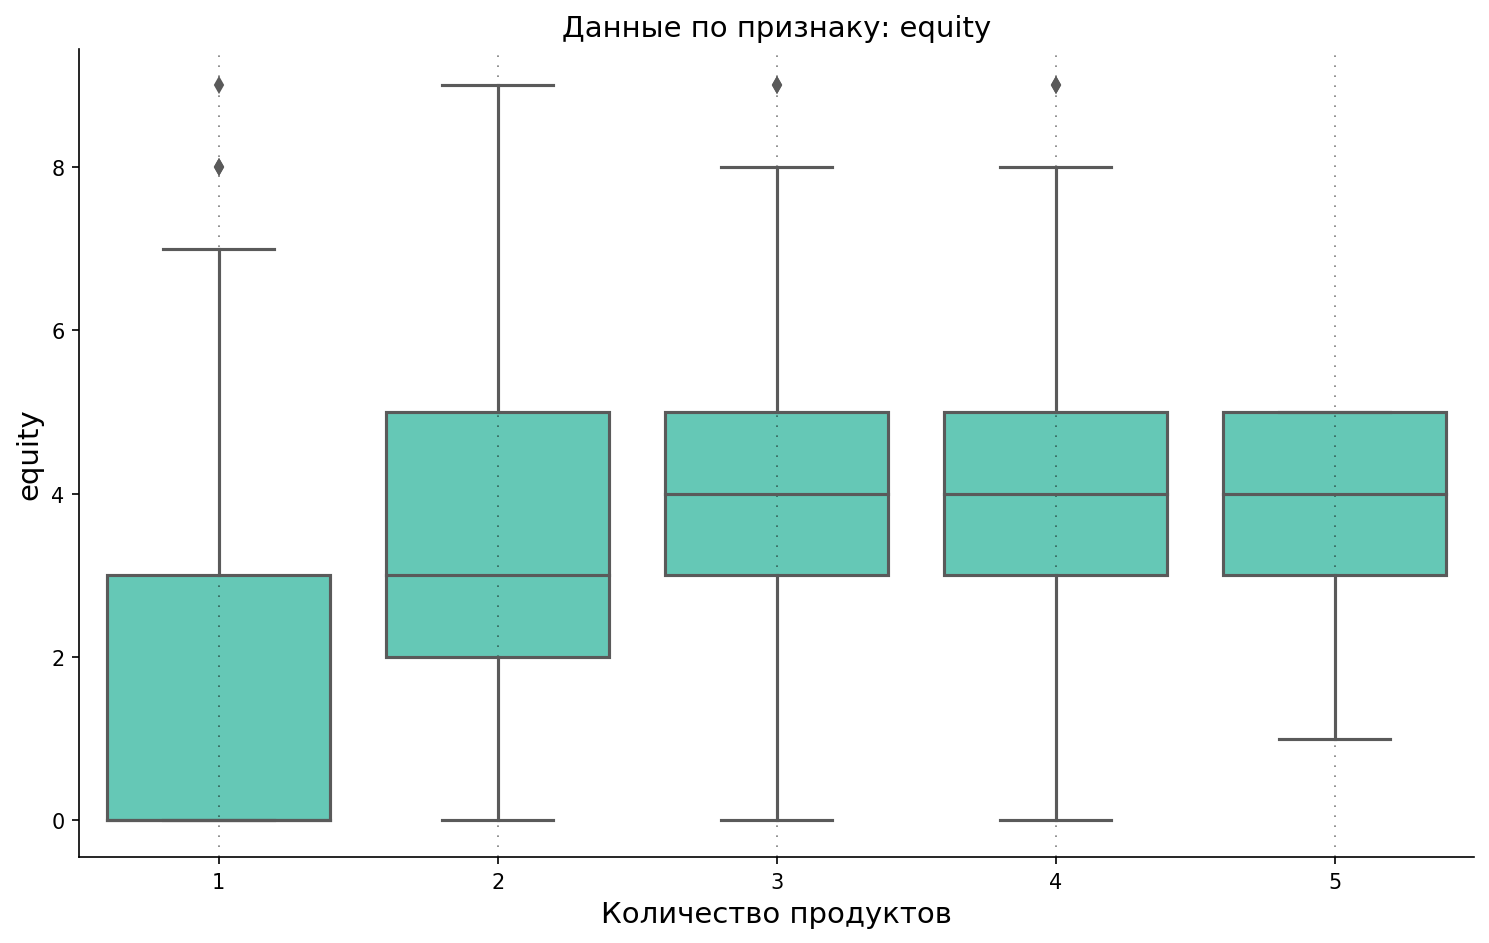

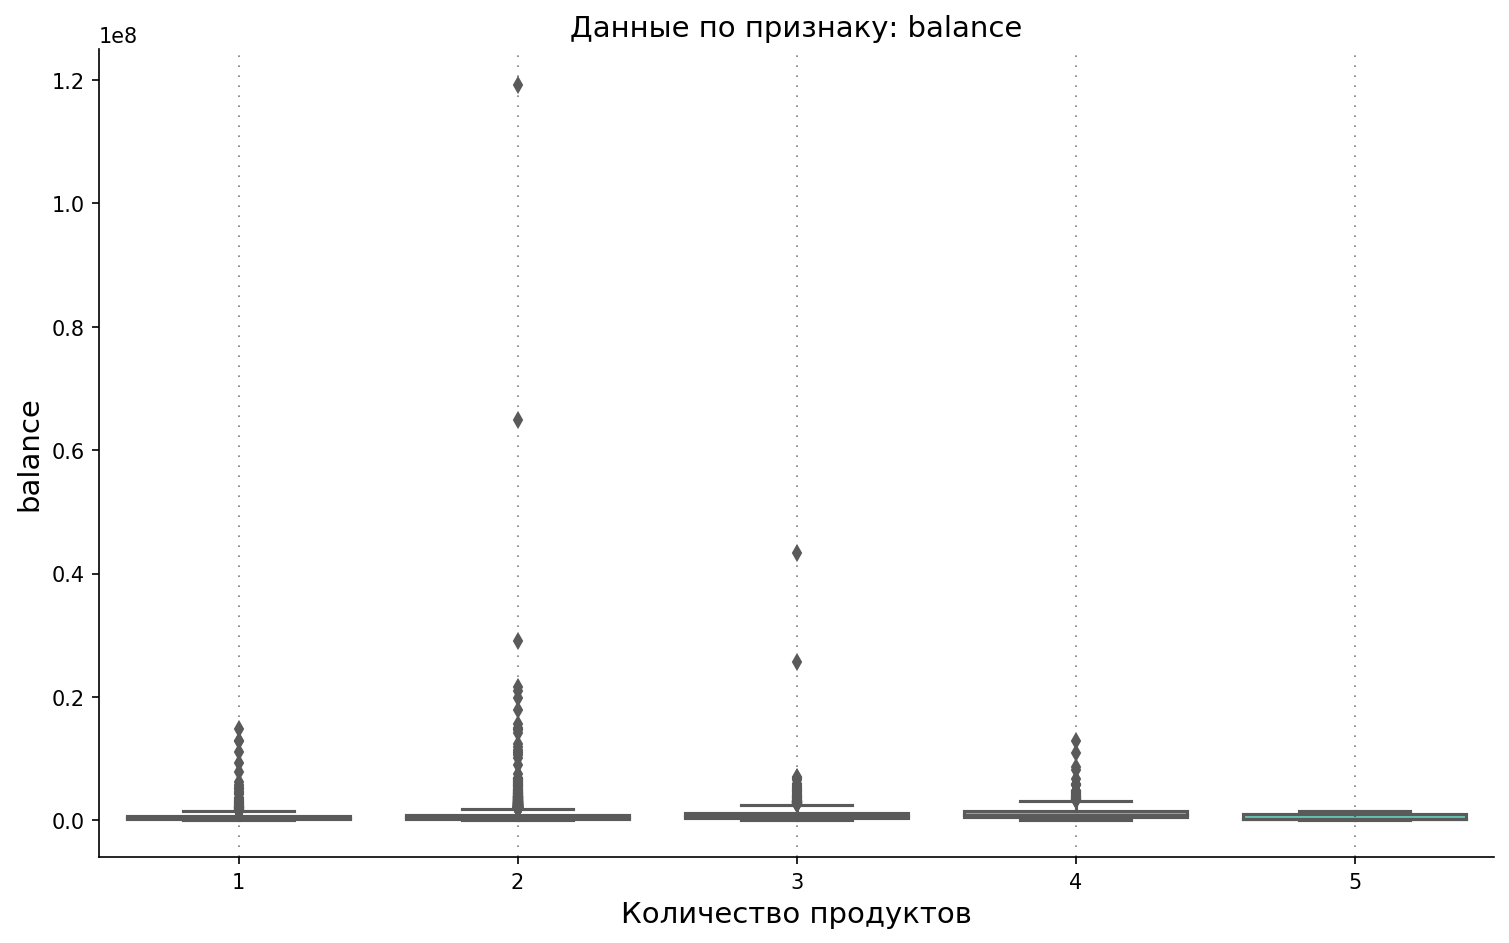

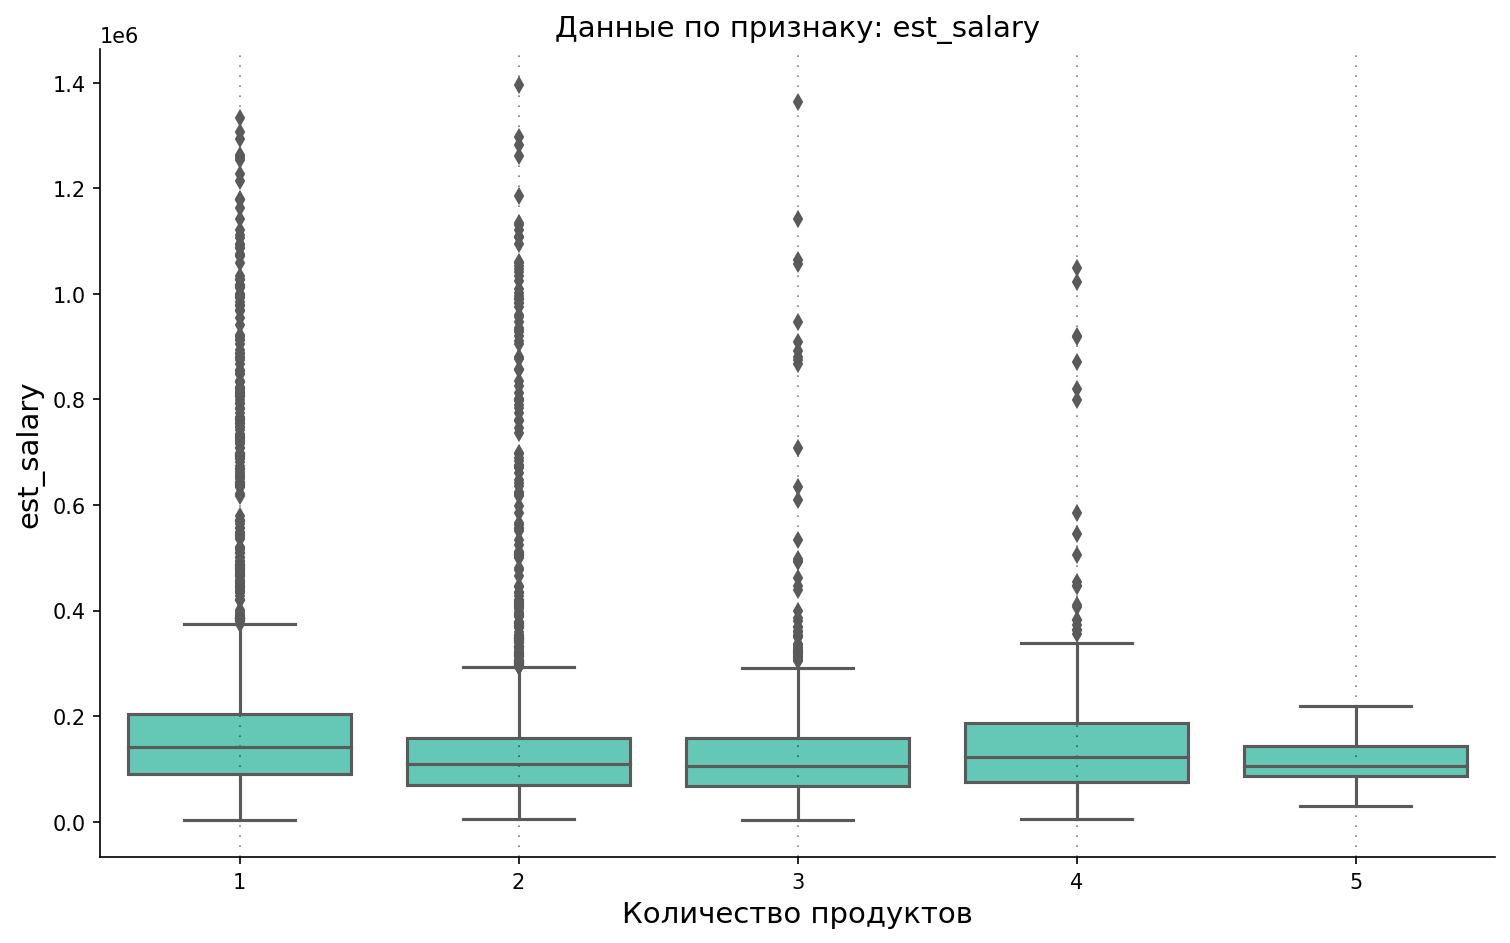

In [19]:
#sns.pairplot(data, hue='churn') 
#plt.show()
columns = ['score', 'age', 'equity', 'balance', 'est_salary']
for col in columns:
    fig = plt.figure(figsize=(12, 7), dpi=150)
    ax = sns.boxplot(x='products', y=col, data=data, color='#55D8C1')
    ax.grid(visible=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_title('Данные по признаку: {}'.format(col), fontsize=14)
    ax.set_xlabel('Количество продуктов', fontsize=14)
    ax.set_ylabel(col, fontsize=14)
    sns.despine()
    plt.show()

Диапазон значений баллов кредитного скоринга по медиане в районе 820 - 880 для всех сегментов пользователей в зависимости от количества продуктов. У клиентов с одним, двумя и тремя продуктами высокие границы размаха нормального распределения.

Средний возраст всех сегментов по продуктам по медиане в районе 40 лет, интересно что средний возраст клиентов с 4 и 5 продуктами чуть моложе 40 лет. У групп с одним и двумя продуктами высокие границы нормального распределения и есть заметные выбросы в районе 80 лет и старше. 

Что касается активов клиентов, мы можем увидеть, что у клиентов с тремя и больше банковскими продуктами активов больше - средний балл 4, чем у клиентов с одним и двумя продуктами - 0 и 3 балла соответственно.

Среднее значение баланса у клиентов всех сегментов примерно одинаковое - низкое не выше 100 тысяч. Практически во всех группах есть выбросы, но заметим,что частые выбросы не превышают 250 тысяч на счетах. Похоже, что в банке много кредитных клиентов и мало клиентов аккумулирующих сберегающих средства.

Средняя заработная плата у клиентов по медиане находится в диапазоне 100-150 тысяч. Границы нормального распределения не высокие, в районе 300 - 400 тысяч. В четырех группах есть высокие частые  выбросы, доходящие до 1 млн. и выше.

По колонке баланс и доход есть выбросы, но они по большой части частые, интересные для исследования, не будем их удалять.

Посмотрим на распределение значений по балансу клиентов без выбросов

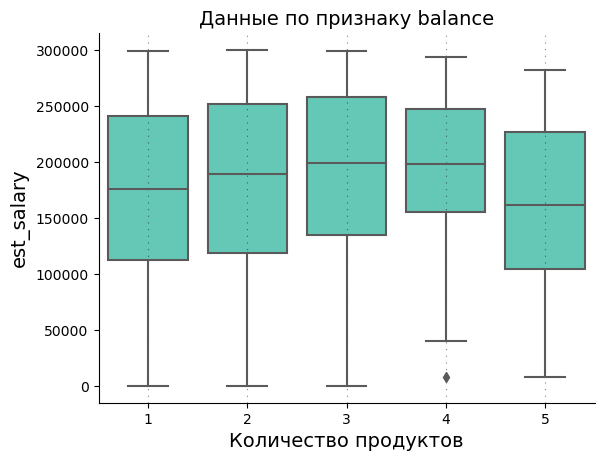

In [20]:
ax = sns.boxplot(x='products', y='balance', data=data.query('balance<300000'), color='#55D8C1')
ax.grid(visible=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax.set_title('Данные по признаку balance', fontsize=14)
ax.set_xlabel('Количество продуктов', fontsize=14)
ax.set_ylabel(col, fontsize=14)
sns.despine()
plt.show()

Посмотрим сколько у нас клиентов с кредитными картами.

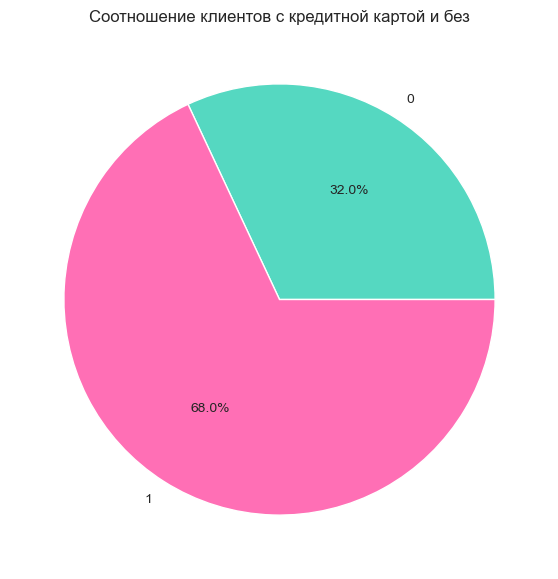

In [69]:
#data['credit_card'] = data['credit_card'].apply(lambda x: 'есть' if x == 1 else 'нет')
card_user = data.groupby('credit_card')['credit_card'].count()
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(card_user,labels=card_user.index, autopct='%1.1f%%', colors = ('#55D8C1', '#FF6FB5'))
ax1.set_title('Соотношение клиентов с кредитной картой и без');

С кредитной картой достаточно большое количество клиентов - 68%. Похоже, что клиенты с двумя продуктами это скорей всего клиенты с кредитными картами, где первый продукт-текущий банковский счет.

Посмотрим на распределение клиентов по городам присутствия банка

 Распределение клиентов по городам 



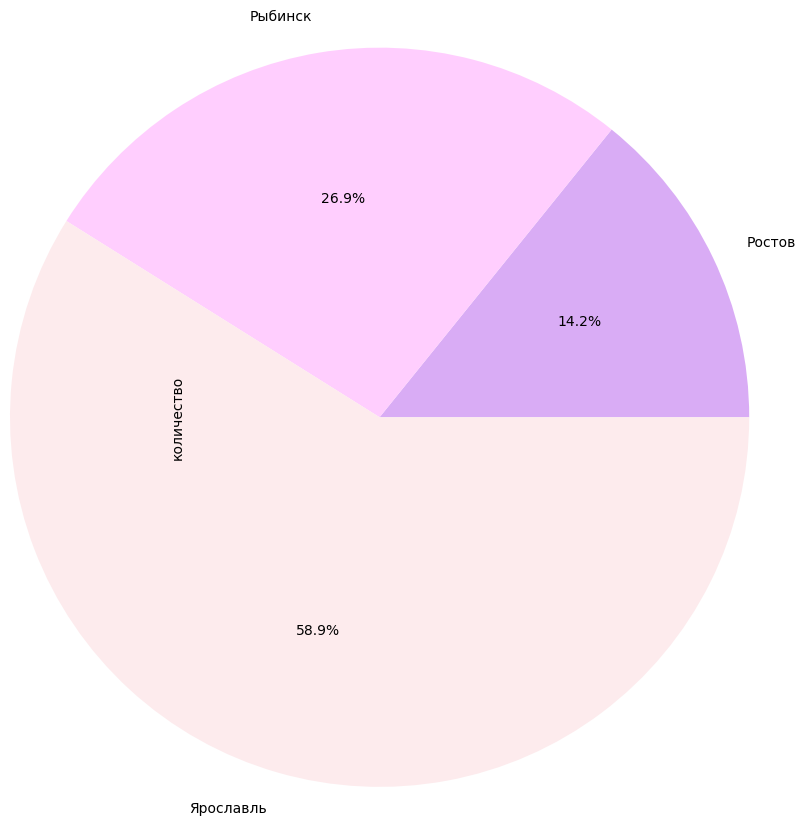

In [22]:
top = data.pivot_table(index='city', values = 'user_id', aggfunc='count').reset_index()
top.columns=['город', 'количество']
top.sort_values(by='количество', ascending=False)
colors = ['#D9ACF5', '#FFCEFE', '#FDEBED']
top.groupby(['город']).sum().plot(kind='pie', radius= 2.5, y='количество',\
                                         autopct='%1.1f%%',colors = colors, legend=None);
print(' Распределение клиентов по городам','\n')

In [23]:
data1 = data.groupby(['city', 'products'], as_index=False)['user_id'].count()
fig = px.bar(data1.sort_values(by='user_id', ascending=True), 
             x='city', 
             y='user_id', 
             color='products',
             text='user_id'
            )

fig.update_layout(xaxis={'categoryorder':'total descending'},
    title='Количество клиентов по городам и имеющимся у них банковским продуктам',
                   xaxis_title='Город',
                   yaxis_title='Количество клиентов',
                   width=800, 
                   height=600)
fig.show() 

Ростов сильно отстает в наращивании клиентской базы по всем категориям продуктов в отличие от двух других городов.

**Исследование дохода клиентов банка.**


Для каждого города выведем медианное значение заработной платы в зависимости от города клиента.

In [24]:
median_salary = data.groupby(['city','churn'])['est_salary'].agg('median').reset_index()
median_salary

city  churn  est_salary
0     Ростов      0   97501.610
1     Ростов      1  107449.130
2    Рыбинск      0  112114.965
3    Рыбинск      1  119234.180
4  Ярославль      0  126641.630
5  Ярославль      1  131807.850

Медианная зарплата выше всего в Ярославле, в Ростове около 100 тысяч. И количество клиентов во всех группах по продуктам у нас выше в Ярославле, в Ростове сегменты по продуктам самые немногочисленные. Нет денег нет развития. 

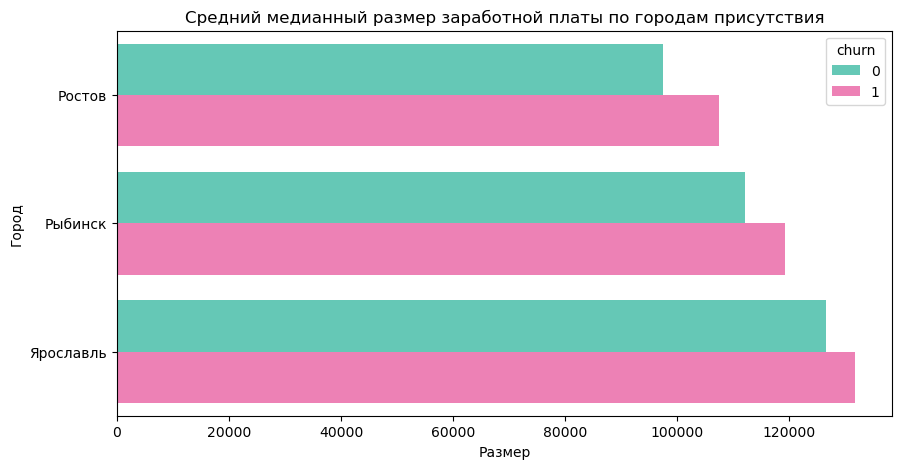

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x="est_salary", y="city", hue = 'churn', data = median_salary, palette = ('#55D8C1', '#FF6FB5'));

plt.title('Средний медианный размер заработной платы по городам присутствия')
plt.xlabel('Размер')
plt.ylabel('Город')
plt.show()

У тех клиентов, которые ушли средний медианный доход чуть чуть выше.

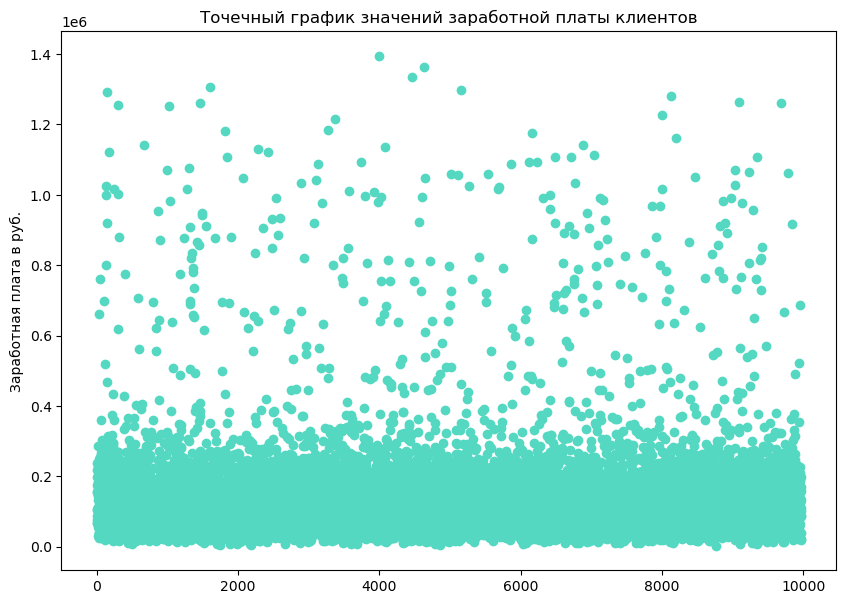

In [26]:
plt.figure(figsize=(10,7))
x_values = pd.Series(range(0, len(data['est_salary'])))
plt.scatter(x_values, data['est_salary'],color='#55D8C1');
plt.title('Точечный график значений заработной платы клиентов')
plt.ylabel('Заработная плата в руб.');

Приведем значения заработной платы в целочисленный тип и сделаем категории заработных плат, для более детального исследования портретов клиентов и их доходов.

In [27]:
data['est_salary'].describe()
data['est_salary'] = data['est_salary'].astype(int)

Сделаем категоризацию колонки est_salary cо следующими диапозонами
0–30000 — 'низкая';
30001–50000 — 'средняя';
50001–200000 — 'выше средней';
200001–1000000 — 'высокая';
1000001 и выше — 'M'

In [28]:
def categorize_salary(income):
    try:
        if 0 <= income <= 30000:
            return 'низкая'
        elif 30001 <= income <= 50000:
            return 'средняя'
        elif 50001 <= income <= 200000:
            return 'выше средней'
        elif 200001 <= income <= 1000000:
            return 'высокая'
        elif income >= 1000001:
            return 'M'
    except:
        pass

In [29]:
data['salary_category'] = data['est_salary'].apply(categorize_salary)
data['salary_category'].value_counts()

выше средней    7028
высокая         1687
средняя          775
низкая           424
M                 59
Name: salary_category, dtype: int64

Больше всего клиентов у нас с доходом - выше среднего и высоким,  клиентов миллионеров - 59 человек (!), обозначим их буквой М.

In [30]:
print(np.nanpercentile(data['est_salary'], 95))


316366.79999999993


Не более 5% клиентов банка имеет доход выше 316 885 руб.

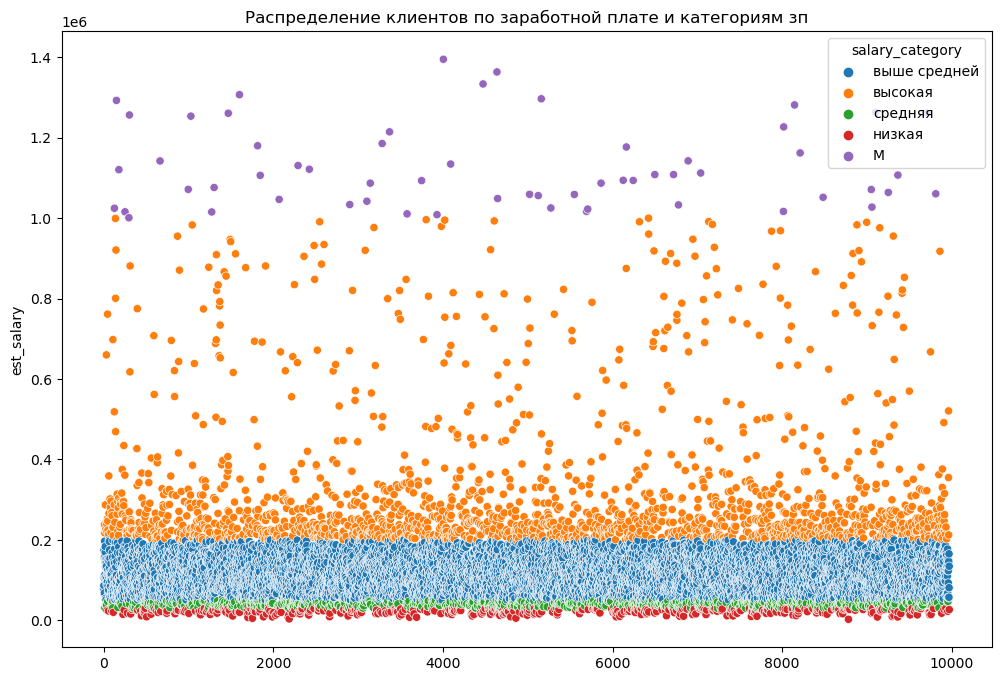

In [31]:
plt.figure(figsize=(12,8))
plt.title('Распределение клиентов по заработной плате и категориям зп')
sns.scatterplot(data= data, \
                x= x_values, y='est_salary',hue = 'salary_category');

Самая многочисленная категория клиентов - клиенты с доходом от 50 тысяч до 200 тысяч.

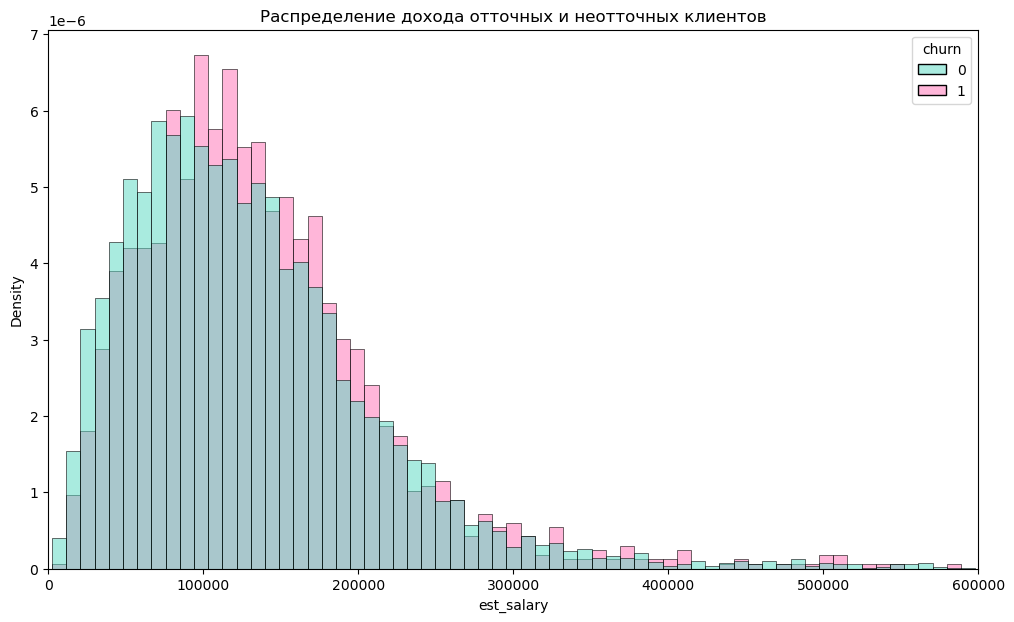

In [32]:
fig = plt.figure(figsize=(12, 7))
sns.histplot(data=data,hue = 'churn', x = 'est_salary', stat = 'density',common_norm=False, palette = ['#55D8C1', '#FF6FB5'])
plt.title('Распределение дохода отточных и неотточных клиентов')
plt.xlim(0,600000)
plt.ylim()
plt.show()

С высоким доходом мы можем увидеть клиентов с большей долей оттока, но как мы помним клиентов с доходом более 320к очень мало - не больше 5%.

Посмотрим на медианный доход мужчин и женщин, проверим размер дохода в зависимости от того имеет клиент кредитную карту или нет.

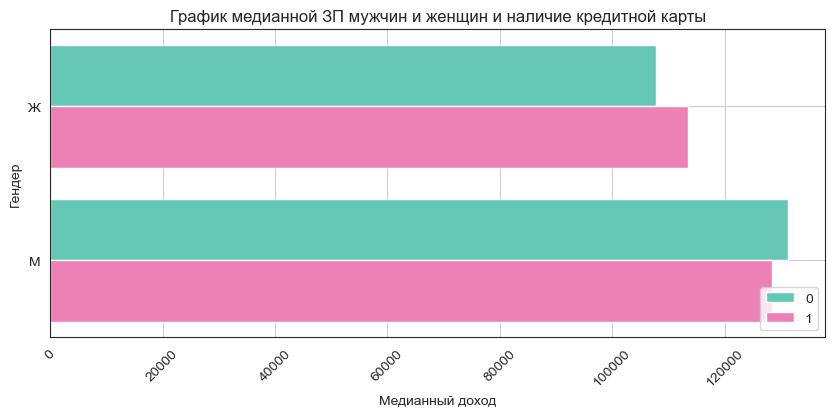

In [33]:
# группируем данные по гендеру и наличию кредитной карты и считаем медианный доход
data_gender = data.groupby(['gender', 'credit_card'], \
                        as_index = False)[['est_salary']].median()
# используем стиль white из библиотеки seaborn
sns.set_style('white')

plt.figure(figsize=(10, 4))
# строим график средствами seaborn
sns.barplot(x='est_salary', y='gender', data=data_gender, hue='credit_card', palette = ['#55D8C1', '#FF6FB5'])

plt.title('График медианной ЗП мужчин и женщин и наличие кредитной карты')
plt.xlabel('Медианный доход')
plt.ylabel('Гендер')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

У женщин медианных доход меньше чем у мужчин, но у женщин, имеющих кредитную карту он чуть больше медианного дохода женщин без кредитной карты, а у мужчин наоборот чуть меньше.

**Взаимосвязи характеристик. Матрица корреляций**

Переведем категориальные переменные в количественные

In [34]:
data['gender'] = data['gender'].map({'М':1, 'Ж':0})

In [35]:
data_corr = pd.get_dummies(data)
data_corr.head()

user_id  score  gender  age  equity     balance  products  credit_card  \
0   183012  850.0       0   25       1    59214.82         2            0   
1   146556  861.0       0   37       5   850594.33         3            1   
2   120722  892.0       0   30       0         NaN         1            1   
3   225363  866.0       0   51       5  1524746.26         2            0   
4   157978  730.0       1   34       5      174.00         1            1   

   last_activity  est_salary  churn  city_Ростов  city_Рыбинск  \
0              1       75719      1            0             1   
1              0       86621      0            0             1   
2              1      107683      0            0             1   
3              1      174423      1            0             0   
4              0       67353      1            0             0   

   city_Ярославль  salary_category_M  salary_category_высокая  \
0               0                  0                        0   
1               0                  0                        0   
2               0                  0                        0   
3               1                  0                        0   
4               1                  0                        0   

   salary_category_выше средней  salary_category_низкая  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             1                       0   

   salary_category_средняя  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

Воспользуемся матрицей коэффициентов phi_k, это универсальный метод, так как позволяет вычислять взаимосвязи между различными типами признаков (категориальными, непрерывными и их комбинациями), в нем используются передовые статистические методики и его легко применить с библиотекой phik.

interval columns not set, guessing: ['score', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'salary_category_M', 'salary_category_высокая', 'salary_category_выше средней', 'salary_category_низкая', 'salary_category_средняя']


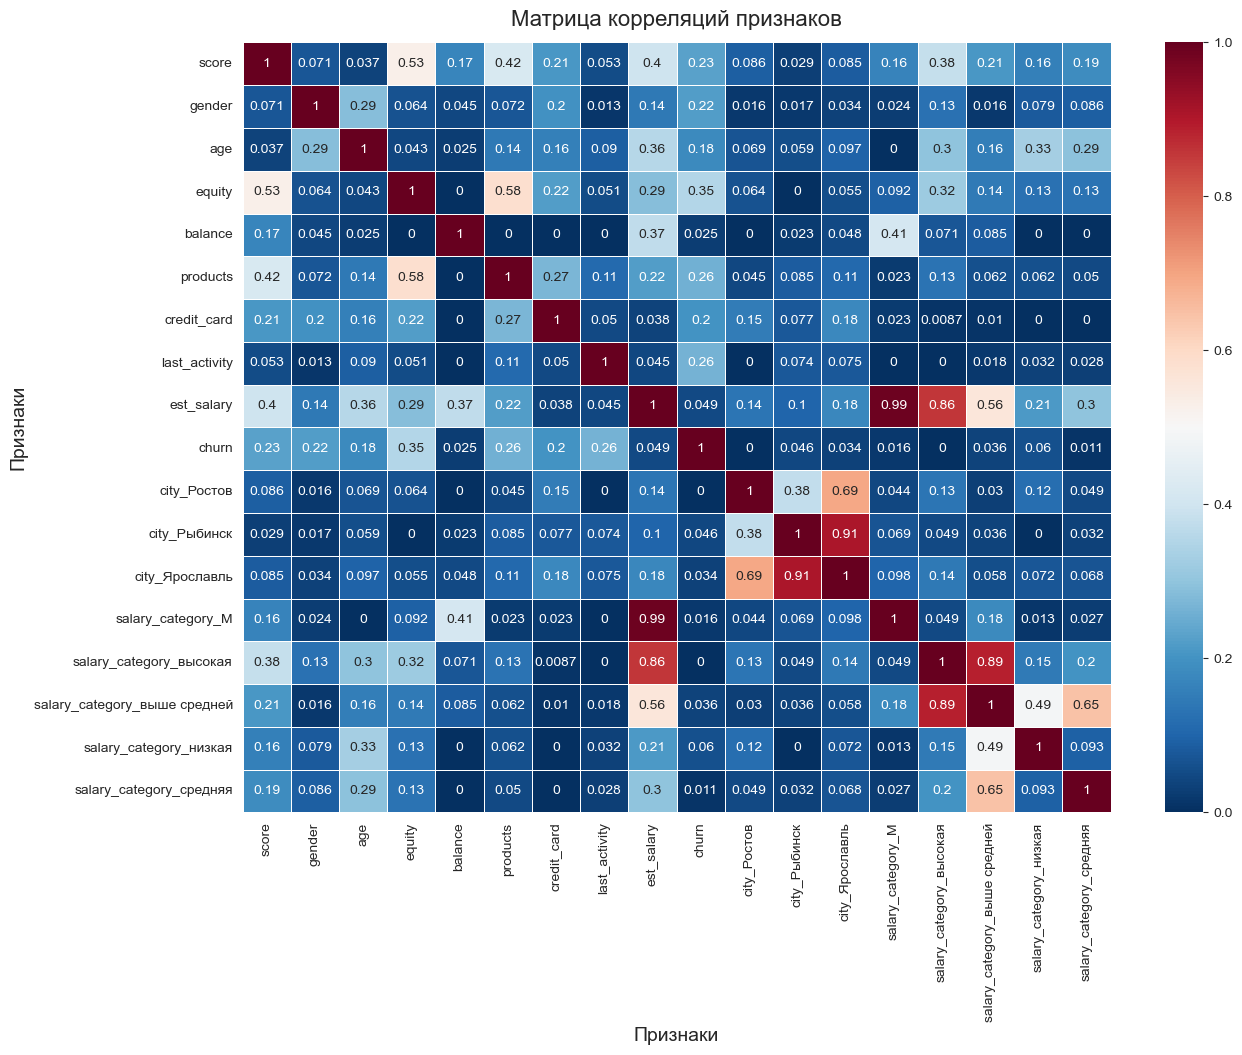

In [36]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(data_corr.drop(['user_id'], axis=1).phik_matrix(), annot = True, linewidths=.5, cmap="RdBu_r")
heatmap.set_title('Матрица корреляций признаков', fontdict={'fontsize':16}, pad=12)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.show()


Видим заметную корреляцию между кредитным скорингом, количеством используемых продуктов и активами клиента в баллах. Корреляция баланса счета и дохода -0,37 а с группой Миллионеры - 0.41.

Слабую корреляцию между количеством банковских продуктов и оттоком 0,26, активами и оттоком - 0,35, пользовательской активностью и оттоком - 0,26. 

Есть слабая корреляция возраста и дохода клиента.

**Исследование активности и оттока клиентов**

In [37]:
data.groupby(['churn','last_activity']).agg({'user_id':'count'})

user_id
churn last_activity         
0     0                 4217
      1                 3938
1     0                  541
      1                 1277

Посмотрим взаимосвязь активности клиентов и оттока на графике

In [38]:
av = data.groupby(['churn', 'last_activity'], as_index=False)['user_id'].count()
fig = px.bar(av.sort_values(by='user_id', ascending=True), 
             x='last_activity', 
             y='user_id', 
             color='churn',
             text='user_id',
            )

fig.update_layout(xaxis={'categoryorder':'total descending'},
    title='Активность клиентов и отток',
                   xaxis_title='Активность',
                   yaxis_title='Количество клиентов',
                   width=800, 
                   height=600)
fig.show() 

Здесь график показал интересный момент, активных клиентов уходит больше чем неактивных. Возможно это связано с негативным опытом взаимодействия с банком, его продуктами, сервисами, приложением.

Посмотрим на активных клиентов в зависимости от их дохода и города проживания

In [39]:
active_klient = data.pivot_table(index=['salary_category', 'city'],values='last_activity',aggfunc = ['sum','count','mean'])
active_klient.columns = ['Количество активных по категории','Общее число','Доля активных клиентов']
active_klient['Доля неактивных клиентов'] = 1 - active_klient['Доля активных клиентов'] 
active_klient.sort_values(by='Доля неактивных клиентов', ascending=False)



Количество активных по категории  Общее число  \
salary_category city                                                       
высокая         Ростов                                   58          127   
M               Ярославль                                27           59   
выше средней    Ярославль                              2002         4054   
высокая         Ярославль                               594         1161   
средняя         Ярославль                               210          398   
выше средней    Ростов                                  546         1033   
высокая         Рыбинск                                 218          399   
низкая          Рыбинск                                  58          106   
выше средней    Рыбинск                                1092         1941   
средняя         Ростов                                   81          141   
низкая          Ярославль                               119          203   
                Ростов                                   68          115   
средняя         Рыбинск                                 142          236   

                           Доля активных клиентов  Доля неактивных клиентов  
salary_category city                                                         
высокая         Ростов                   0.456693                  0.543307  
M               Ярославль                0.457627                  0.542373  
выше средней    Ярославль                0.493833                  0.506167  
высокая         Ярославль                0.511628                  0.488372  
средняя         Ярославль                0.527638                  0.472362  
выше средней    Ростов                   0.528558                  0.471442  
высокая         Рыбинск                  0.546366                  0.453634  
низкая          Рыбинск                  0.547170                  0.452830  
выше средней    Рыбинск                  0.562597                  0.437403  
средняя         Ростов                   0.574468                  0.425532  
низкая          Ярославль                0.586207                  0.413793  
                Ростов                   0.591304                  0.408696  
средняя         Рыбинск                  0.601695                  0.398305

Неактивных клиентов достаточно много, по всем категориям зарплат, больше всего неактивных в Ростове (категория зп высокая, выше средней) а также в Ярославле по всем значимым категориям дохода клиентов - в районе 47-54%. На этих клиентов стоит обратить внимание, разработать персональные предложения для них.

churn
0    8155
1    1818
Name: churn, dtype: int64


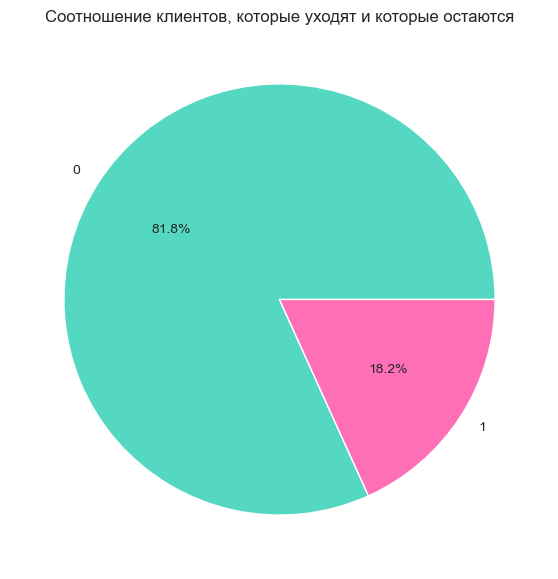

In [40]:
data['churn'].apply(lambda x: 'уходят' if x == 1 else 'остаются')
churn_user = data.groupby('churn')['churn'].count()
print(churn_user)
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(churn_user,labels=churn_user.index, autopct='%1.1f%%', colors = ('#55D8C1', '#FF6FB5'))
ax1.set_title('Соотношение клиентов, которые уходят и которые остаются');

Посчитаем доли отточных клиентов в зависимости от количества используемых продуктов в трех группах: с одним, двумя и 3-5 банковских продуктов.

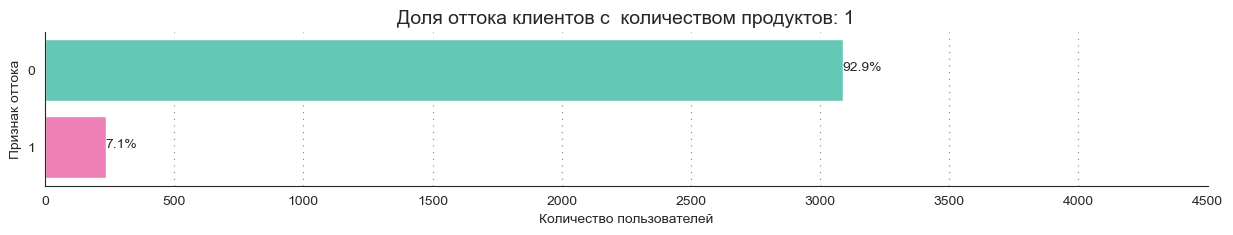

In [41]:
fig = plt.figure(figsize=(15, 2))
ax = sns.countplot(y='churn', data=data[(data['products'] == 1)], palette = ['#55D8C1', '#FF6FB5'])
total = data[data['products'] == 1].shape[0]
ax.grid(visible=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax.set_title('Доля оттока клиентов с  количеством продуктов: {}'.format(1), fontsize=14)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Признак оттока')
ax.set_xlim([0, 4500])
sns.despine()
plt.show()

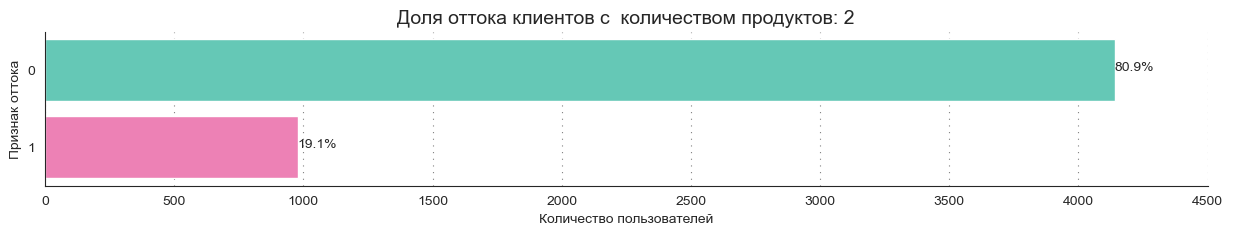

In [42]:
fig = plt.figure(figsize=(15, 2))
ax = sns.countplot(y='churn', data=data[(data['products'] == 2)], palette = ['#55D8C1' ,'#FF6FB5'])
total = data[data['products'] == 2].shape[0]
ax.grid(visible=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax.set_title('Доля оттока клиентов с  количеством продуктов: {}'.format(2), fontsize=14)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Признак оттока')
ax.set_xlim([0, 4500])
sns.despine()
plt.show()

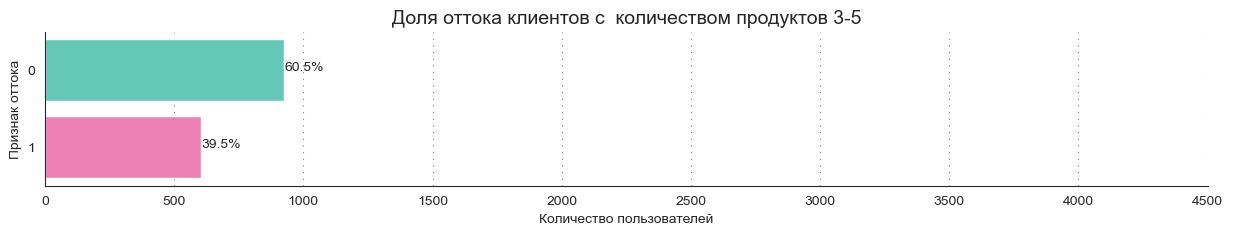

In [43]:
fig = plt.figure(figsize=(15, 2))
ax = sns.countplot(y='churn', data=data[(data['products'] >= 3)], palette = ['#55D8C1', '#FF6FB5'])
total = data[data['products'] >= 3].shape[0]
ax.grid(visible=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax.set_title('Доля оттока клиентов с  количеством продуктов 3-5', fontsize=14)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Признак оттока')
ax.set_xlim([0, 4500])
sns.despine()
plt.show()

Видим большую долю оттока клиентов с количеством продуктов 3 и больше - почти 40%, с двумя продуктами тоже существенный отток - приближается к 20%.

**Группы и Cегменты клиентов**

Посмотрим на взаимосвязь значений баланса и количества продуктов, используемых клиентами банка с помощью kde графика

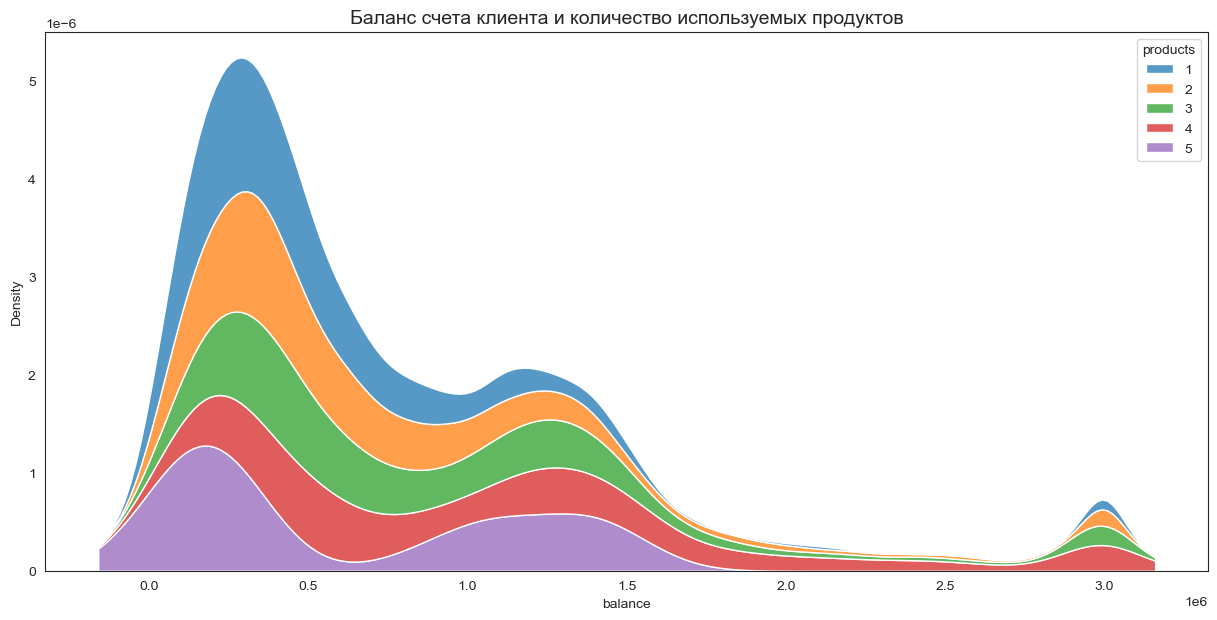

In [44]:
fig = plt.figure(figsize=(15, 7))
ax = sns.kdeplot(
    data=data.assign(
        balance = data.balance.clip(0,3e6),
        products = data.products.clip(1,5)
    ), x='balance', hue='products', bw_adjust=1/2,
    common_norm=False, palette='tab10', multiple='stack')
ax.set_title('Баланс счета клиента и количество используемых продуктов', fontsize=14);

Видим, что баланс счета в районе миллиона и выше чаще встречается у клиентов с 3-5 продуктами.

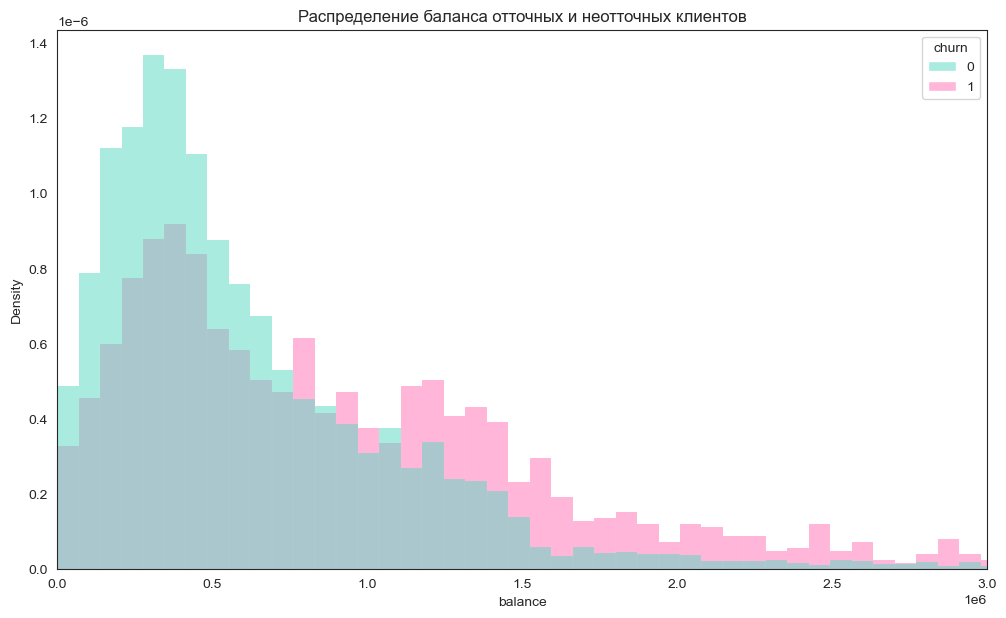

In [45]:
fig = plt.figure(figsize=(12, 7))
sns.histplot(data=data,hue = 'churn', x = 'balance', stat = 'density',common_norm=False, palette = ['#55D8C1', '#FF6FB5'])
plt.title('Распределение баланса отточных и неотточных клиентов')
plt.xlim(0,3000000)
plt.ylim()
plt.show()

Клиенты с балансом от 700к и выше сильно отточны, как показывает график

Выделим **сегмент премиум клиентов** банка по количеству продуктов и балансу счета

In [46]:
premium = data.query('products >=3 and balance >=1000000').reset_index()
print('Количество премиум клиентов:',len(premium))

Количество премиум клиентов: 598


In [47]:
premium.groupby (['last_activity']).agg({'user_id':'count'})


user_id
last_activity         
0                  282
1                  316

Премиум клиентов - 598, из них неактивных порядка 50%, они могут уйти в будущем. Отток - 55%. Рекомендация: рассмотреть возможность предложения индивидуальной программы лояльности с целью удержания и уменьшения оттока премиум клиентов.

Посмотрим отточных клиентов в разрезе разных возрастов

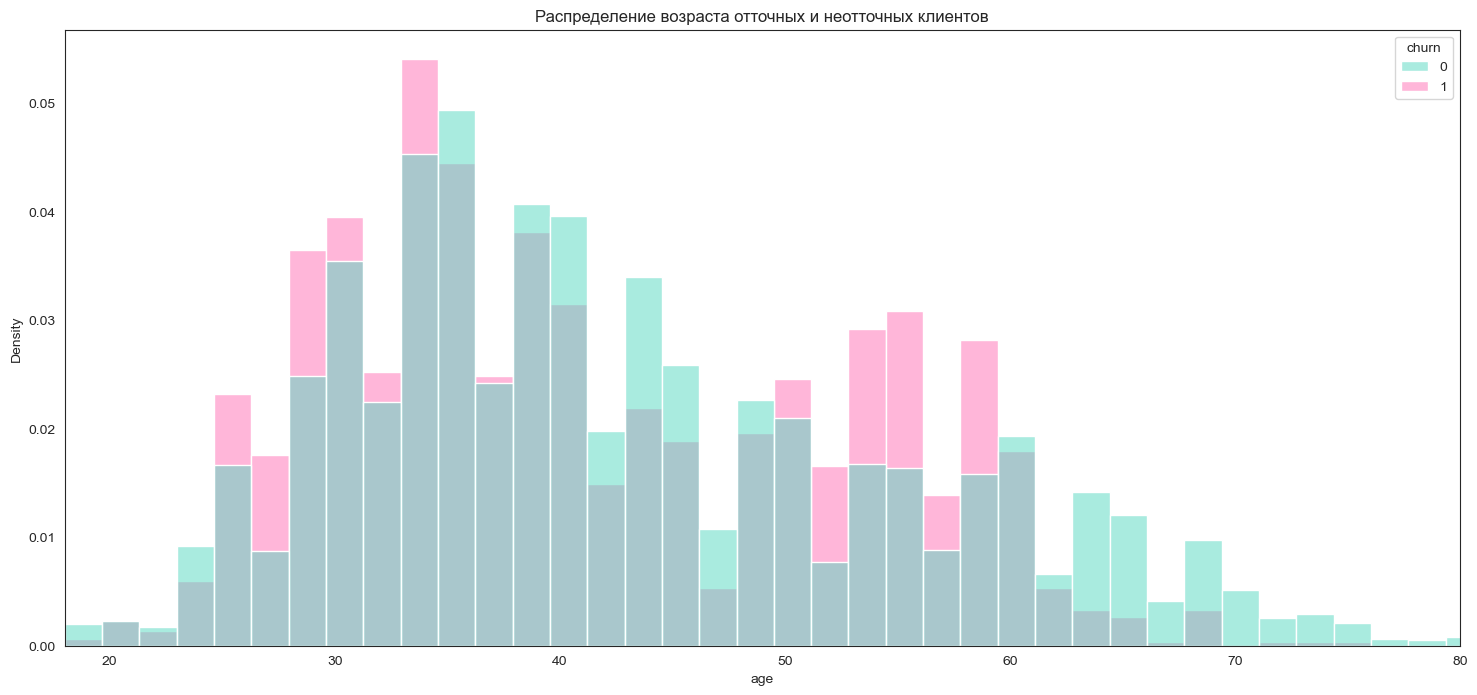

In [48]:
fig = plt.figure(figsize=(18, 8))
sns.histplot(data=data,hue = 'churn', x = 'age', stat = 'density',common_norm=False, palette = ['#55D8C1', '#FF6FB5'])
plt.title('Распределение возраста отточных и неотточных клиентов')
plt.xlim(18,80)
plt.ylim()
plt.show()

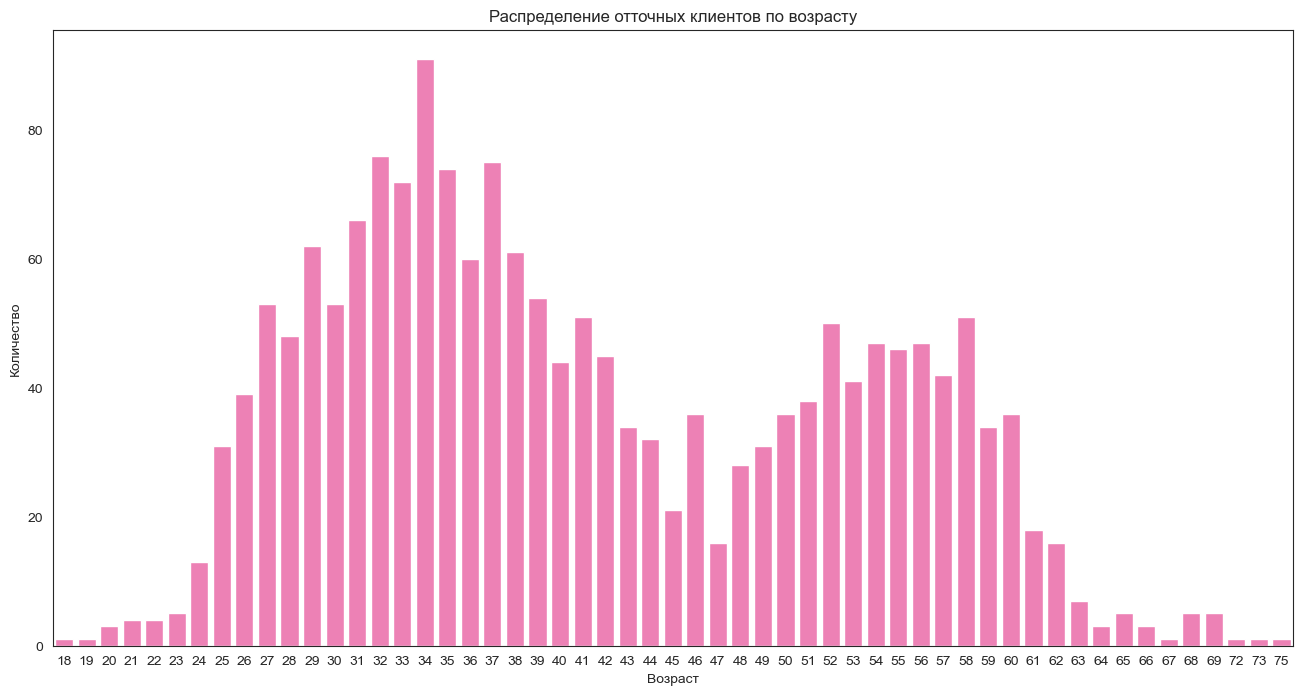

In [49]:
age_data = data[data['churn']==1]['age'].value_counts().reset_index()
age_data.columns= ['age', 'count']
plt.figure(figsize=(16, 8))
sns.barplot(x='age', y = 'count', data=age_data.sort_values(by='age', ascending=True), color='#FF6FB5')

plt.xlabel('Возраст')
plt.ylabel('Количество') 
plt.title('Распределение отточных клиентов по возрасту')
plt.show()

График показал отток по категориям возраста. Большая отточная группа - 25-45 и 46-62. Менее отточные: 18-24 и  взрослая группа 63+.
Заметим что группа 18-35 это начало работы, первая кредитная карта, первый автокредит, брак, первый ребенок. 35-55 это пик заработка, ипотека, их интересует долговая нагрузка. Группа 55-65 это хранители, их интересует пенсионные накопления и  инвестирование. Поэтому рекомендация: более индивидульный подход к потребностям возрастных групп, в банке много кредитных клиентов, при этом они высокоотточны (25-46), также стоит рассмотреть трасформацию программы вкладов, накопительных счетов для клиентов группы хранителей пенсионных накоплений, возможность инвестирования пенсионнных накоплений.

В соответствии с матрицей корреляций мы видели заметную корреляцию оттока и оценки объектов собственности клиента (equity) посмотрим на графике распределение.

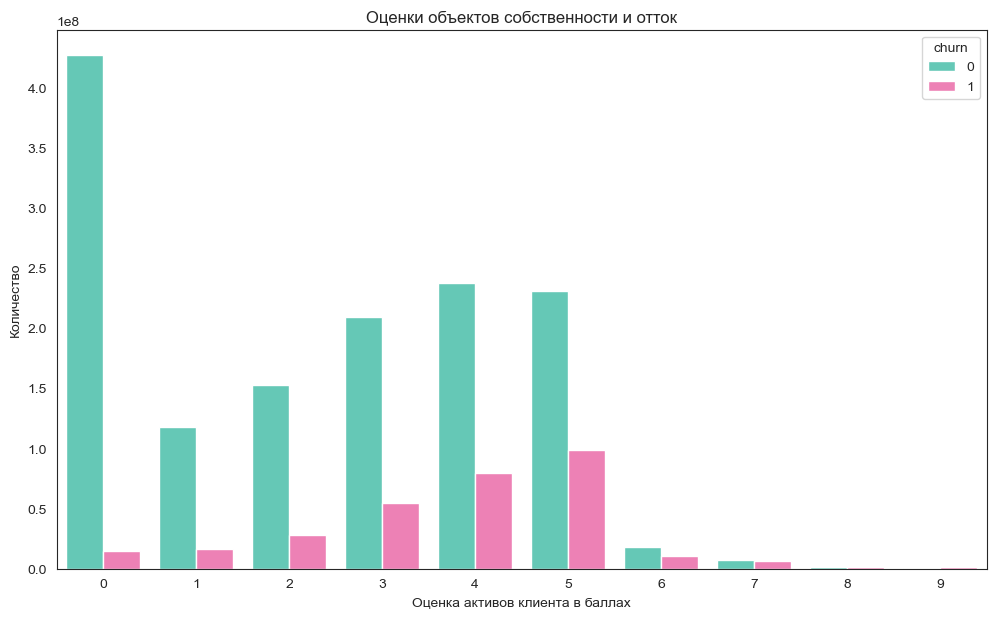

In [50]:
plt.figure(figsize=(12, 7))
sns.barplot(x="equity", y="user_id", hue = 'churn',\
            data = data.groupby(['churn', 'equity'],as_index=False)['user_id'].sum(),
            palette = (['#55D8C1', '#FF6FB5']))

plt.xlabel('Оценка активов клиента в баллах')
plt.ylabel('Количество')
plt.title('Оценки объектов собственности и отток')
plt.show()

Посчитаем долю отточных в зависимости от оценки активов клиентов

In [51]:
equity_churn = data.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['perc'] = equity_churn['sum']/equity_churn['count']*100
equity_churn

sum  count       perc
equity                       
0        90   2576   3.493789
1        93    773  12.031048
2       166   1051  15.794481
3       321   1540  20.844156
4       464   1847  25.121819
5       576   1915  30.078329
6        58    161  36.024845
7        37     80  46.250000
8         6     17  35.294118
9         7     13  53.846154

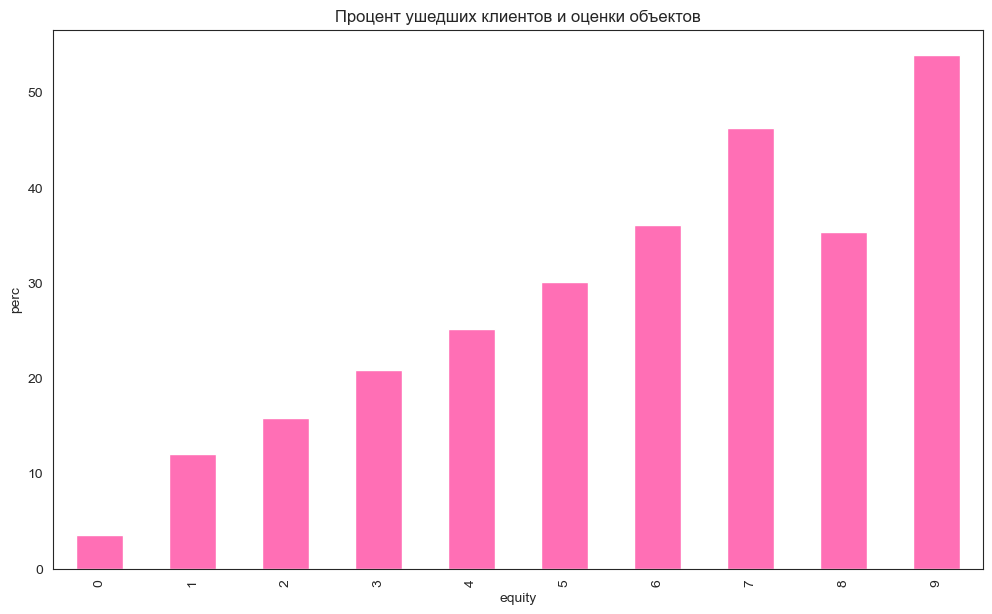

In [52]:
equity_churn['perc'].plot(
    kind='bar', title = 'Процент ушедших клиентов и оценки объектов', figsize = (12,7), color = '#FF6FB5', 
    xlabel = 'equity', ylabel = 'perc');


**Группа высокоотточных клиентов** 

Посмотрим количество клиентов с большим риском оттока по количеству продуктов и возрасту в категории 25-60 лет. 

In [53]:
age_ottok = data.query('products >=3 and age >= 25 and age <=60').reset_index()
print('Количество потенционально сильно отточных клиентов:',len(age_ottok))

Количество потенционально сильно отточных клиентов: 1321


In [54]:
age_ottok.describe().T

count          mean           std      min        25%  \
index          1321.0  5.017919e+03  2.876155e+03      1.0    2516.00   
user_id        1321.0  1.716896e+05  3.470554e+04  95384.0  142769.00   
score          1321.0  8.501544e+02  5.691862e+01    689.0     805.00   
gender         1321.0  5.352006e-01  4.989483e-01      0.0       0.00   
age            1321.0  4.073581e+01  9.365507e+00     25.0      34.00   
equity         1321.0  3.741862e+00  1.561607e+00      0.0       3.00   
balance        1294.0  1.070308e+06  1.600616e+06     63.0  386455.64   
products       1321.0  3.377744e+00  5.123517e-01      3.0       3.00   
credit_card    1321.0  4.731264e-01  4.994664e-01      0.0       0.00   
last_activity  1321.0  5.412566e-01  4.984837e-01      0.0       0.00   
est_salary     1321.0  1.442521e+05  1.260600e+05   7522.0   77596.00   
churn          1321.0  4.314913e-01  4.954719e-01      0.0       0.00   

                      50%          75%          max  
index            5025.000     7496.000      9999.00  
user_id        172805.000   201398.000    229058.00  
score             848.000      893.000      1000.00  
gender              1.000        1.000         1.00  
age                39.000       48.000        60.00  
equity              4.000        5.000         9.00  
balance        710783.365  1319254.965  43277099.84  
products            3.000        4.000         5.00  
credit_card         0.000        1.000         1.00  
last_activity       1.000        1.000         1.00  
est_salary     119432.000   172506.000   1363549.00  
churn               0.000        1.000         1.00

В этой группе с большим диапозоном возраста 25-60 отток -43%, отметим, что  клиенты имеют высокий кредитный скоринг, медиана по балансу в районе 711 000 и медианный доход в районе 120 000.

**Группы неотточных клиентов**

Пол: любой

Возраст: 35-48

Город: любой

Оценка объектов собственности: 0 и 1

Скоринговый рейтинг: >= 800

Количество используемых продуктов: 1 и 2

Наличие кредитной карты: есть

Пользовательская активность: любой

In [55]:
neottok = data.query(
    'equity <=1 and score >= 800 and credit_card==1 and age >=35 \
    and age <=48 and products <= 2').reset_index()
print ('Количество клиентов в сегменте неотточных клиентов среднего возраста:', len(neottok))
neottok.agg({"churn":["mean","sum","count"]})

Количество клиентов в сегменте неотточных клиентов среднего возраста: 727


churn
mean     0.033012
sum     24.000000
count  727.000000

Отток в этой группе - 3,3%.

In [56]:
neottok.describe().T

count           mean            std        min        25%  \
index          727.0    4997.867950    2850.105112      11.00    2608.50   
user_id        727.0  172799.163686   33329.399102  114437.00  144277.50   
score          727.0     901.246217      39.865112     800.00     887.00   
gender         727.0       0.599725       0.490291       0.00       0.00   
age            727.0      40.381018       3.933584      35.00      37.00   
equity         727.0       0.191197       0.393514       0.00       0.00   
balance        163.0  249077.060798  175272.898219    9878.17  151624.12   
products       727.0       1.231087       0.421818       1.00       1.00   
credit_card    727.0       1.000000       0.000000       1.00       1.00   
last_activity  727.0       0.522696       0.499829       0.00       0.00   
est_salary     727.0  225899.451169  173710.682790   16077.00  144285.00   
churn          727.0       0.033012       0.178792       0.00       0.00   

                     50%        75%         max  
index            4975.00    7460.00     9996.00  
user_id        172953.00  202154.00   229052.00  
score             907.00     927.00      990.00  
gender              1.00       1.00        1.00  
age                40.00      44.00       48.00  
equity              0.00       0.00        1.00  
balance        235590.58  309379.93  1145890.07  
products            1.00       1.00        2.00  
credit_card         1.00       1.00        1.00  
last_activity       1.00       1.00        1.00  
est_salary     186821.00  240896.00  1256537.00  
churn               0.00       0.00        1.00

У неотточных клиентов среднего возраста высокий кредитный скоринг, медиана по балансу счета в районе 235 000 и медианный доход в районе 187 000.

Группа неотточных клиентов старшего возраста

In [57]:
pens = data.query('age >=61 and age <=80 and products >= 1').reset_index()
print ('Количество клиентов в сегменте неотточных клиентов старшего возраста:', len(pens))

Количество клиентов в сегменте неотточных клиентов старшего возраста: 1019


In [58]:
pens.describe().T

count           mean           std       min         25%  \
index          1019.0    4760.601570  2.875011e+03       9.0    2252.500   
user_id        1019.0  171830.366045  3.245745e+04  114087.0  144204.500   
score          1019.0     850.562316  6.345557e+01     642.0     806.000   
gender         1019.0       0.218842  4.136642e-01       0.0       0.000   
age            1019.0      66.004907  4.272746e+00      61.0      63.000   
equity         1019.0       2.670265  1.928794e+00       0.0       1.000   
balance         815.0  998490.032294  4.335034e+06      45.0  345691.595   
products       1019.0       1.887144  7.050349e-01       1.0       1.000   
credit_card    1019.0       0.582924  4.933177e-01       0.0       0.000   
last_activity  1019.0       0.557409  4.969371e-01       0.0       0.000   
est_salary     1019.0   97036.081452  1.098337e+05    3487.0   42384.500   
churn          1019.0       0.064769  2.462393e-01       0.0       0.000   

                     50%        75%           max  
index            4632.00     7173.5  9.998000e+03  
user_id        173872.00   198851.5  2.289630e+05  
score             854.00      900.0  9.960000e+02  
gender              0.00        0.0  1.000000e+00  
age                65.00       68.0  8.000000e+01  
equity              3.00        4.0  9.000000e+00  
balance        595149.58  1040622.7  1.191136e+08  
products            2.00        2.0  4.000000e+00  
credit_card         1.00        1.0  1.000000e+00  
last_activity       1.00        1.0  1.000000e+00  
est_salary      70258.00   114697.5  1.106453e+06  
churn               0.00        0.0  1.000000e+00

Видим, что в этой группе клиентов старшего возраста, отток -6%, баланс по счету выше по медиане - около 600 000, скорей всего это накопительные счета, вклады. Доход в этом сегменте по медиане - 70 258.

Посмотрим на группы мужчин и женщин в разрезе оттока

sum  count       perc
gender                        
0        635   4982  12.745885
1       1183   4991  23.702665

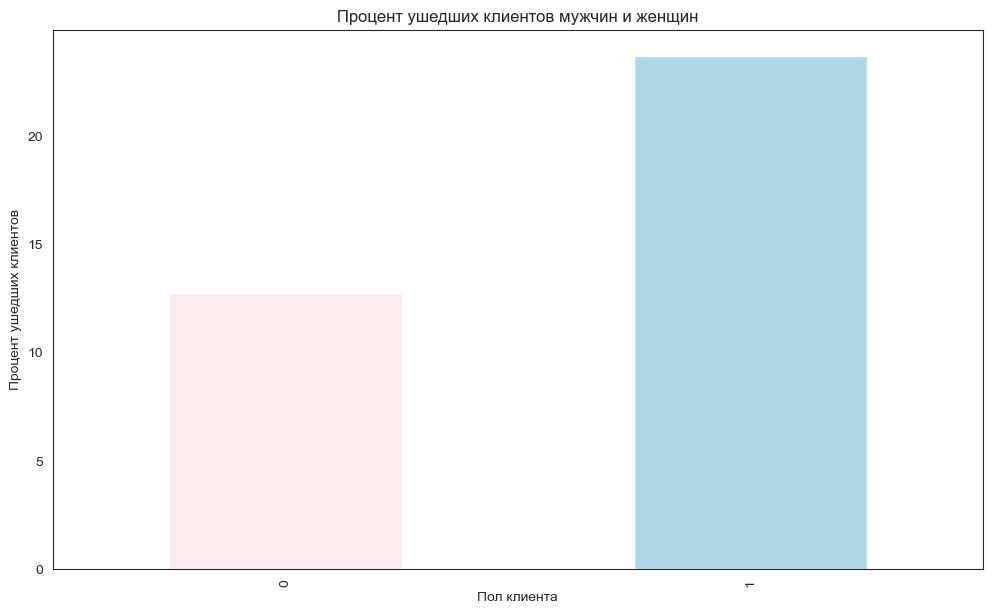

In [59]:
gender_churn = data.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['perc'] = gender_churn['sum']/gender_churn['count']*100


gender_churn['perc'].plot(
    kind='bar', title = 'Процент ушедших клиентов мужчин и женщин', figsize = (12,7), color = ['#FDEBED','lightblue'], 
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов');

gender_churn

Видим, что ушедших мужчин почти в два раза больше чем ушедших женщин, женщины более стабильны в пользовании банковскими услугами, но у мужчин больше уровень доходов, больше уровень баланса чем у женщин, стоит проанализировать как можно уменьшать отток мужчин, возможно предлагать инвестирование средств в различные инструменты, мужчины не очень любят тратить, им интересно увеличивать доход.

Посмотрим на клиентов женщин с кредитной картой, двумя банковскими продуктами и кредитным скорингом выше 800, рассчитаем долю отточных

In [60]:
#Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №5:', data.query (
    'gender==0 and score >= 800 and credit_card==1 and products == 2')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №5:', data.query (
    'gender==0 and score >= 800 and credit_card==1 and products == 2 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №5:', data.query (
    'gender==0 and score >= 800 and credit_card==1 and products == 2 and churn==1')['user_id'].count() / data.query (
    'gender==0 and score >= 800 and credit_card==1 and products == 2')['user_id'].count()*100)


Общее число пользователей в сегменте №5: 1130
Число отточных пользователей в сегменте №5: 94
Доля отточных пользователей в сегменте №5: 8.31858407079646


Посмотрим на клиентов мужчин с такими же параметрами и рассчитаем долю оттока

In [61]:
#Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №6:', data.query (
    'gender==1 and score >= 800 and credit_card==1 and products == 2')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №6:', data.query (
    'gender==1 and score >= 800 and credit_card==1 and products == 2 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №6:', data.query (
    'gender==1 and score >= 800 and credit_card==1 and products == 2 and churn==1')['user_id'].count() / data.query (
    'gender==1 and score >= 800 and credit_card==1 and products == 2')['user_id'].count()*100)

Общее число пользователей в сегменте №6: 1214
Число отточных пользователей в сегменте №6: 292
Доля отточных пользователей в сегменте №6: 24.052718286655683


Отток мужчин по этим параметрам (наличие кредитной карты и два продукта) уверенно больше - 24% против 8% у женщин клиентов банка. 

Выделим еще более характерные сегменты, добавим параметры активов клиента, кредитного скоринга, наличие и отсутствие кредитной карты и др.

**Сегмент №1**

**Пол: мужской**

Возраст: 46-62

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

In [62]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №1:', data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №1:', data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:', data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count() / data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count()*100)

Общее число пользователей в сегменте №1: 49
Число отточных пользователей в сегменте №1: 32
Доля отточных пользователей в сегменте №1: 65.3061224489796


**Сегмент №2**

**Пол: женский**

Возраст: 46-62

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: 3 и больше

Наличие кредитной карты: нет

Пользовательская активность: да

In [63]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №2:', data.query (
    'gender==0 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №2:', data.query (
    'gender==0 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:', data.query (
    'gender==0 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count() / data.query (
    'gender==0 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count()*100)

Общее число пользователей в сегменте №2: 68
Число отточных пользователей в сегменте №2: 32
Доля отточных пользователей в сегменте №2: 47.05882352941176


C такими же заданными параметрами как и у мужчин, мы видим, что женщин клиентов больше по количеству и они менее отточны - 47% против 65,3%.

Посмотрим на сегмент мужчин с такими же параметрами но с количеством продуктов 1 и 2

**Сегмент №3**

**Пол: мужской**

Возраст: 46-62

Город: любой

Оценка объектов собственности: 1 и выше

Скоринговый рейтинг: 800 и выше

**Количество используемых продуктов: меньше 3х**

Наличие кредитной карты: нет

Пользовательская активность: да

In [64]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №1:', data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products < 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №1:', data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products <3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:', data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products <3 and churn==1')['user_id'].count() / data.query (
    'gender==1 and equity>=1 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products <3')['user_id'].count()*100)

Общее число пользователей в сегменте №1: 104
Число отточных пользователей в сегменте №1: 63
Доля отточных пользователей в сегменте №1: 60.57692307692307


В мужском сегменте с такими же параметрами но с количеством банковских продуктов меньше 3х также большой отток - 60,5%. 

Посмотрим на сегмент молодежи, они избирательны под них необходимо настраивать программы кредитования, предлагать ипотеку, интересные условия по дебетовым картам, их необходимо удерживать ведь они будущие аккамуляторы денег, будущие накопители и инвесторы.

**Группа Молодежь**

Пол: любой

**Возраст: 24-35**

Город: любой

Оценка объектов собственности: любой

Скоринговый рейтинг: 800 и выше

Количество используемых продуктов: 2 и больше

Наличие кредитной карты: любой

Пользовательская активность: да

In [65]:
print ('Общее число пользователей в группе:', data.query (
    'score >= 800 and last_activity==1 and age>=24 \
    and age<=35 and products >=2')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в группе:', data.query (
    'score >= 800 and last_activity==1 and age>=24 \
    and age<=35 and products >=2 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в группе:', data.query (
    'score >= 800 and last_activity==1 and age>=24 \
    and age<=35 and products >=2 and churn==1')['user_id'].count() / data.query (
    'score >= 800 and last_activity==1 and age>=24 \
    and age<=35 and products >=2')['user_id'].count()*100)

Общее число пользователей в группе: 901
Число отточных пользователей в группе: 448
Доля отточных пользователей в группе: 49.722530521642625


Небольшое количество молодежи среди клиентов банка и отток большой - порядка 50%. 

**Статистический анализ данных**

Гипотеза №1: о различии среднего возраста клиентов, использующих один и два банковских продукта

Сформулируем нулевую и альтернативную гипотезы:

H0: Средний возраст клиентов, использующих один продукт и использующих два продукта одинаков, статистически значимых отличий нет.

Н1: Средний возраст клиентов, использующих один продукт и два продукта различен, статистически значимые отличия есть.

Выборки достаточно большого размера но разные по размеру, мы не знаем равная ли дисперсия у двух выборок. Для проверки гипотезы проведем t-test с использованием параметр equal_var = False, тогда тест посчитает дисперсии выборок по отдельности.

In [66]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['products']==1]['age'],
    data[data['products']==2]['age'], equal_var = False)

# критический уровень статистической значимости
alpha = 0.05 

# вывод значения p-value на экран 
print (results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.03299080704232691
Отвергаем нулевую гипотезу


Проведенный t-test показал, что нулевую гипотезу об отсутствии различий среднего возраста клиентов с одним продуктом и двумя есть основания отвергнуть, статистически значимая разница по возрасту есть.

Гипотеза №2: О различии дохода клиентов, использующих один продукт и использующих три и больше продуктов.

Н0: Средний доход групп клиентов, использующих один продукт и использующих три и более продукта одинаков, статистически значимых различий нет.

Н1: Средний доход групп клиентов, использующих один продукт и использующих три и более различается, статистически значимая разница есть.

In [67]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['products']==1]['est_salary'],
    data[data['products']>=3]['est_salary'], equal_var = False)

# критический уровень статистической значимости
alpha = 0.05 

# вывод значения p-value на экран 
print (results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.8430662602116846e-26
Отвергаем нулевую гипотезу


P-значение слишком мало и стремится к нулю, у нас есть основание отвергнуть нулевую гипотезу, что средний доход клиентов, использующих один банковский продукт и клиентов, использующих 3-5 равен между собой. Статистически значимая разница есть.

Гипотеза 3: О различии доходов оставшихся и отточных клиентов.

H0: средние доходы оставшихся и отточных клиентов равны

H1: средние доходы оставшихся и отточных клиентов не равны

Для проверки гипотезы проведем t-test:

In [68]:
# results = вызов метода для проверки гипотезы

df = data.query('est_salary <= 900000')
results = st.ttest_ind (
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'], equal_var = False)

# критический уровень статистической значимости
alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.18494614595633485
Не получилось отвергнуть нулевую гипотезу


P-value больше критического уровня значимости alpha, нет оснований отвергать нулевую гипотезу, статистически значимых различий между доходами отточных клиентов и оставшихся нет.

**Итоговые выводы и рекомендации**

1.Исследование показало, что в банке есть серьезные проблемы с оттоком клиентов практически всех возрастных групп клиентов, а также большой процент неактивных клиентов.

Матрица корреляций показала среднюю корреляцию между количеством банковских продуктов и оценкой объектов собственности а также скоринговым рейтингом клиента.  
Между оттоком клиентов и некоторыми параметрами существует слабая корреляция, тогда как другие параметры практически не влияют на отток, в том числе доходы клиента.

К параметрам, влияющим на отток, относятся:

оценка объектов собственности клиента: чем выше оценка собственности, тем больше процент отточных клиентов;

скоринговый рейтинг клиента, из банка уходили клиенты с хорошим и высоким скоринговым баллом;

количество продуктов, которыми пользуется клиент: клиенты, использовавшие 3-5 продукта, уходили из банка намного чаще, чем другие;

наличие кредитной карты: отсутствие у клиента кредитной карты сильно повышало риск его оттока из банка;

активность пользователя: более активные клиенты покидали банк чаще, чем менее активные;

пол пользователя: мужчины намного сильнее склонны уходить из банка, чем женщины, почти в два раза;

возраст пользователя: наиболее отточные возрастные группы - 46-62 и 25-45.

2.Был проведен статистический анализ следующих гипотез:

**Гипотеза №1** о различии возраста клиентов, использующих один продукт и два продукта: **подтвердилась**

**Гипотеза №2** о различии дохода клиентов, использующих один продукт и использующих три и больше продуктов: **подтвердилась**

**Гипотеза №3** о различии доходов оставшихся и отточных клиентов: **не подтвердилась**




3.Группы и сегменты клиентов. 

Группа потенциально сильно отточных клиентов (возраст 25-60, 3 и больше продукта)- 1321

Группа отточных клиентов c 3-5 продуктами - 605

Группа активных отточных мужчин - 1277

Группа неооточных клиентов (35-48, 1 и 2 продукта,с кредитной картой) - 727

Группа неотточных людей старшего возраста 61+  - 1019

Группа отточных женщин, общее количество - 635

Группа отточных мужчин,общее количество - 1183

Группа неотточных женщин с кредитной картой и двумя продуктами - 1130

Группа слабоотточных мужчин с кредитной картой и двумя продуктами - 1214

Группа молодежь (активны, возраст 24-35, два и больше продукта) - 901

Сегмент суперотточных мужчин (активны, 46-62, продукты >=3 ,без кредит. карты) - 49

Сегмент сильноотточных женщин (активны, 46-62, продукты >=3, без кредит. карты)- 68

Сегмент суперотточных мужчин (активны 46-62, продукты < 3, без кредитной карты) - 104

Сегмент премиум (баланс => 1000 000, продуктов 3-5) -598

Общий охват клиентов - 10831 человек.


Исследование показало что мужчины более отточны чем женщины, почти в два раза. Сегмент мужчин с кредитной картой и двумя продуктами сильнее отточен чем такой же сегмент женщин - 24% против 8%. 
Женщины более стабильны в пользовании банковскими услугами, но у мужчин больше уровень доходов, больше баланс счета чем у женщин, стоит проанализировать как можно уменьшать отток мужчин, возможно предлагать инвестирование средств в различные инструменты, мужчины не очень любят тратить, им интересно увеличивать доход.

Были выделены отточные группы клиентов в зависимости от количества используемых продуктов, самая большая доля оттока в группе, использующих 3-5 продуктов. Стоит проанализировать сами продукты, ставки по продуктам, условия предоставления.

Выделен сегмент премиум клиентов, использующих 3 и больше продуктов и имеющих на балансе счета 1 млн и больше рублей.

Заметили, что клиенты с высоким балансом счета сильно отточны, возможно в банке неконкурентные ставки по накопительным счетам и вкладам, возможно повлиял негативный опыт пользования банковскими услугами, приложением, дистанционным обслуживанием. Для активных клиентов можно предположить, что отсутствуют варианты управления своим счетом: вложение в различные активы, акции облигации и другие инструменты. Клиентам с невысоким баллом по объектам в собственности можно предложить ипотечный продукт.

Также были выделены высокооточные сегменты среди мужчин и женщин. Это мужчины и женщины без кредитной карты, активные пользователи услуг, использующие 3 и больше продукта, с хорошим кредитным рейтингом в возрасте 46-62. Рекомендация: сделать им индивидуальные предложения, кредитная карта, ипотечный продукт, накопительные счета, возможность инвестирования денежных средств.

Немногочисленный сегмент молодежи в диапазоне возраста 24-35, использующих 2 продукта и больше, доля оттока порядка -50%. Рекомендация: Интересные условия по дебетовой карте, система кэшбэка отвечающая их интересам, ипотечный продукт, кредитная карта.

Сегмент клиентов самого старшего возраста 63+  неотточный с хорошим балансом счета, им интересна история сбережения и накопления пенсионных средств. Для них имеет смысл разрабатывать подобные сервисы и услуги интересных пенсионных программ.

**Рекомендации для отдела маркетинга:**

1.Рассмотреть возможность разработать индивидуальные программы обслуживания в зависимости от сегмента клиента,
необходимо трансформировать кредитные программы в программы с более интересными условиями, исследование показало что в банке много кредитных клиентов и имеется существенный отток, стоит проанализировать конкурентность текущих ставок по кредитам.

2.Высокоотточным взрослым активным клиентам без кредитной карты легко уйти из банка, можно их знакомить с новыми банковскими продуктами, предлагать кредитные карты, страхование объектов собственности, интересные накопительные программы, возможность инвестирования накопленных средств.

3.Группа Молодежь предоставить кредитные программы с актуальными ставками, дебетовые карты с интересными для них условиями обслуживания,  систему кэшбэка, отвечающую запросам людей молодого возраста, их стоит удерживать потому как они будущие клиенты других групп: аккумулирующих средства, вступающие в ипотеку, накапливающие и инвестирующие активы.

4.Сегмент старшего возраста 63+. Стоит проанализировать и настроить программу кэшбека, отвечающую запросам этой группы клиентов, также обратить внимание на программы сохранения и увелечения накопленных средств, индивидуальные ставки по накопительным счетам.

Ссылка на презентацию: https://disk.yandex.ru/i/h1-4WFUJN0j7sQ
